# **0. Import libraries**


In [1]:
import os
import numpy as np
from glob import glob
from tqdm import tqdm
import pickle as pkl

# Data Viz
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

# File & Data Processing
import pandas as pd
import zipfile
import re
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup

# Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Machine learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import itertools
from sklearn.decomposition import PCA
from sklearn.naive_bayes import BernoulliNB
import sklearn

# Report & Visualize evaluation of Machine learning models
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

# Training model
import tensorflow as tf

# **1. Helper function**

## 1.1. Ploting function

In [2]:
np.random.seed(0)
tf.random.set_seed(1)

In [3]:
def show_line_plot(data, name_xlabel, name_ylabel, name_title, name_label):
    plt.figure(figsize = (15,4))
    plt.xlabel(name_xlabel)
    plt.ylabel(name_ylabel)
    plt.title(name_title)
    plt.plot(data, label=name_label)
    plt.legend()
    plt.grid(True)
    plt.show()

def show_countplot(data, column, order, name_xlabel, name_ylabel, name_title, vertical = False):
    plt.figure(figsize = (15, 8))
    ax = sns.countplot(x = column, data = data, order = order)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f"{int(height)}", (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)
    if (vertical == True):
      plt.xticks(rotation = "vertical")
    plt.xlabel(name_xlabel)
    plt.ylabel(name_ylabel)
    plt.title(name_title)
    plt.show()

def show_barplot_group(data, x_column, y_column, estimator, order, name_xlabel, name_ylabel, name_title, vertical = False):
    plt.figure(figsize = (15, 8))
    ax = sns.barplot(data = data, x = x_column, y = y_column, estimator = estimator, order = order)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, -50),
                    textcoords = 'offset points')
    if (vertical == True):
        plt.xticks(rotation = "vertical")
    plt.xlabel(name_xlabel)
    plt.ylabel(name_ylabel)
    plt.title(name_title)
    plt.show()

def show_barplot_individual(data, column, name_xlabel, name_ylabel, name_title, rotation = 45):
    plt.figure(figsize = (10, 5))
    ax = data[column].plot(kind = 'bar', color = 'blue')
    ax.set_xticklabels(data.index, rotation = rotation)
    plt.title(name_title)
    plt.xlabel(name_xlabel)
    plt.ylabel(name_ylabel)
    plt.show()

def show_violin_plot(data, x_column, y_column, name_xlabel, name_ylabel, name_title, vertical = False):
    plt.figure(figsize = (15, 8))
    sns.violinplot(data = data, x = x_column, y = y_column)
    if (vertical == True):
        plt.xticks(rotation = "vertical")
    plt.xlabel(name_xlabel)
    plt.ylabel(name_ylabel)
    plt.title(name_title)
    plt.show()

def show_KDE_plot(data, x_column, hue_column, name_xlabel, name_title, vertical = False):
    plt.figure(figsize = (15, 8))
    sns.kdeplot(x = data[x_column], hue = data[hue_column], label = name_xlabel)
    if (vertical == True):
        plt.xticks(rotation = "vertical")
    plt.xlabel(name_xlabel)
    plt.title(name_title)
    plt.show()

def show_circle_plot(data, name_title):
    fig = px.pie(names=data.index, values=data.values)
    fig.update_layout({"title":{'text': name_title,"x":0.5}})
    fig.show()

def show_multibar_plot(data, name_xlabel, name_ylabel, name_legend, name_title):
  ax = data.plot(kind = 'bar', title = name_title)
  ax.set(xlabel=name_xlabel, ylabel=name_ylabel)
  plt.legend(loc=(1.05, 0.5), title=name_legend)
  plt.show()

def plot_confusion_matrix(y_test, result, title):
    fig, ax = plt.subplots(1,1,figsize=(6,6))
    confuse = metrics.confusion_matrix(y_test, result)
    sns.heatmap(confuse, annot = True, fmt='d', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# 1.2. Create Stopword dictionary

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [5]:
stop_words = set(stopwords.words('english')) - {'not', 'no', 'nor'}
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 

# **2. Read Data**


## 2.1. Download dataset

In [6]:
!gdown https://drive.google.com/uc?id=1ocUXZu82Vp1ZEYKCDV4GlgPhUYW9GrLv
!gdown https://drive.google.com/uc?id=1og2P8l44wTw4Y2XuglQkbMxbRUMtQ4eT

Downloading...
From: https://drive.google.com/uc?id=1ocUXZu82Vp1ZEYKCDV4GlgPhUYW9GrLv
To: /content/Test.zip
100% 37.6k/37.6k [00:00<00:00, 59.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1og2P8l44wTw4Y2XuglQkbMxbRUMtQ4eT
To: /content/Train.zip
100% 480k/480k [00:00<00:00, 79.8MB/s]


In [7]:
!unzip Train.zip
!unzip Test.zip

Archive:  Train.zip
   creating: Train/
  inflating: Train/train_X.pkl       
  inflating: Train/train_y.pkl       
Archive:  Test.zip
   creating: Test/
  inflating: Test/test_X.pkl         


## 2.2. Read

In [8]:
train_data = pd.read_pickle('Train/train_X.pkl')
test_data = pd.read_pickle('Train/train_y.pkl')
public_test_data = pd.read_pickle('Test/test_X.pkl')

In [9]:
train = pd.DataFrame(train_data)
train['emotion'] = pd.DataFrame(test_data)
train

,0,emotion
0,im feeling abit grouchy with kim,3
1,i just feel like being selfish and really live...,3
2,i spent some time at the school yesterday talk...,5
3,i pray that you feel the presence of god aroun...,1
4,i do like riding on brooms but there is someth...,1
...,...,...
12795,i can think of to quit are not based on my own...,4
12796,i believe people who use fulsome manners only ...,0
12797,i secretly well i guess not secretly anymore f...,4
12798,i to feel unloved when hes god and he has the ...,0


In [10]:
public_test_data = pd.DataFrame(public_test_data)
public_test_data

,0
0,i guess i could have done so many things befor...
1,i was still feeling distraught about the lack ...
2,i feel for peter he was convinced of his unwor...
3,i know that right before going into the psych ...
4,i was feeling pretty good about the day ahead ...
...,...
995,i believe that im love i believe that youre lo...
996,i generally refrain from putting friends bands...
997,i sensed such a feeling when i understood i wa...
998,i feel like ive been tortured in my sleep late...


# **3. Data information**


In [11]:
print("Number of sentence in train_date: ", train[0].shape[0])
print("Number of sentence in public_test_data: ", public_test_data[0].shape[0])

Number of sentence in train_date:  12800
Number of sentence in public_test_data:  1000


In [ ]:
train[0].info()

<class 'pandas.core.series.Series'>
RangeIndex: 12800 entries, 0 to 12799
Series name: 0
Non-Null Count  Dtype 
--------------  ----- 
12800 non-null  object
dtypes: object(1)
memory usage: 100.1+ KB


In [13]:
public_test_data[0].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: 0
Non-Null Count  Dtype 
--------------  ----- 
1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [14]:
list_emotion = train["emotion"].unique()
list_emotion

array([3, 5, 1, 2, 0, 4])

# **4. Understanding Data**

## 4.1- A number of text for each emotion class

In [15]:
emotional_text = train.copy()
emotional_text_public_test = public_test_data.copy()
emotional_text['emotion'].value_counts()

,count
emotion,
1,4290
0,3733
3,1727
4,1550
2,1043
5,457


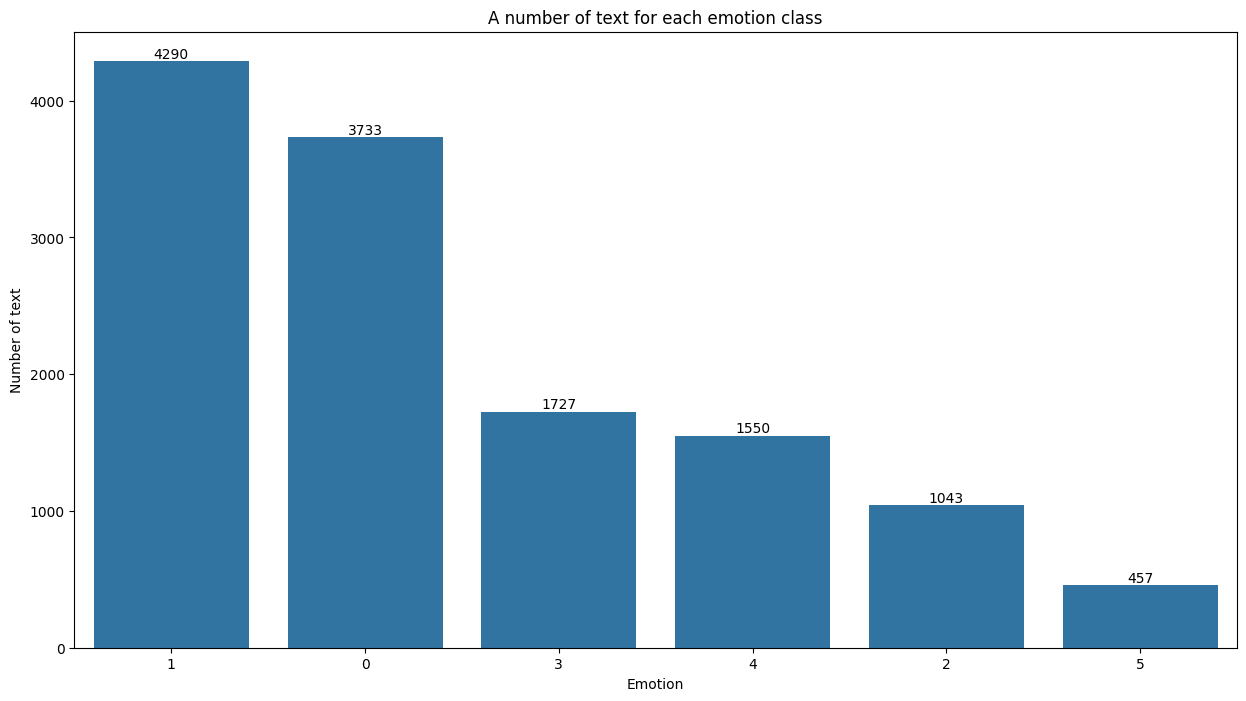

In [16]:
show_countplot(data = emotional_text,
              column = 'emotion',
              order = list(train['emotion'].value_counts().index),
              name_xlabel = 'Emotion',
              name_ylabel = 'Number of text',
              name_title = 'A number of text for each emotion class')

## 4.2.- Statistic about text length for each emotion class

In [17]:
emotional_text["text_len"] = emotional_text[0].apply(len)
emotional_text.head()

,0,emotion,text_len
0,im feeling abit grouchy with kim,3,32
1,i just feel like being selfish and really live...,3,54
2,i spent some time at the school yesterday talk...,5,244
3,i pray that you feel the presence of god aroun...,1,158
4,i do like riding on brooms but there is someth...,1,141


In [18]:
emotional_text.groupby('emotion')['text_len'].describe()

,count,mean,std,min,25%,50%,75%,max
emotion,,,,,,,,
0,3733.0,92.716850,56.210263,7.0,50.0,80.0,122.0,299.0
1,4290.0,98.212354,54.841920,11.0,56.0,88.0,130.0,298.0
2,1043.0,105.162991,55.404812,13.0,63.0,95.0,137.0,299.0
3,1727.0,98.675738,58.184399,9.0,52.0,87.0,135.0,298.0
4,1550.0,96.452258,55.786552,9.0,53.0,86.0,128.0,296.0
5,457.0,102.238512,58.375618,12.0,57.0,90.0,134.0,287.0


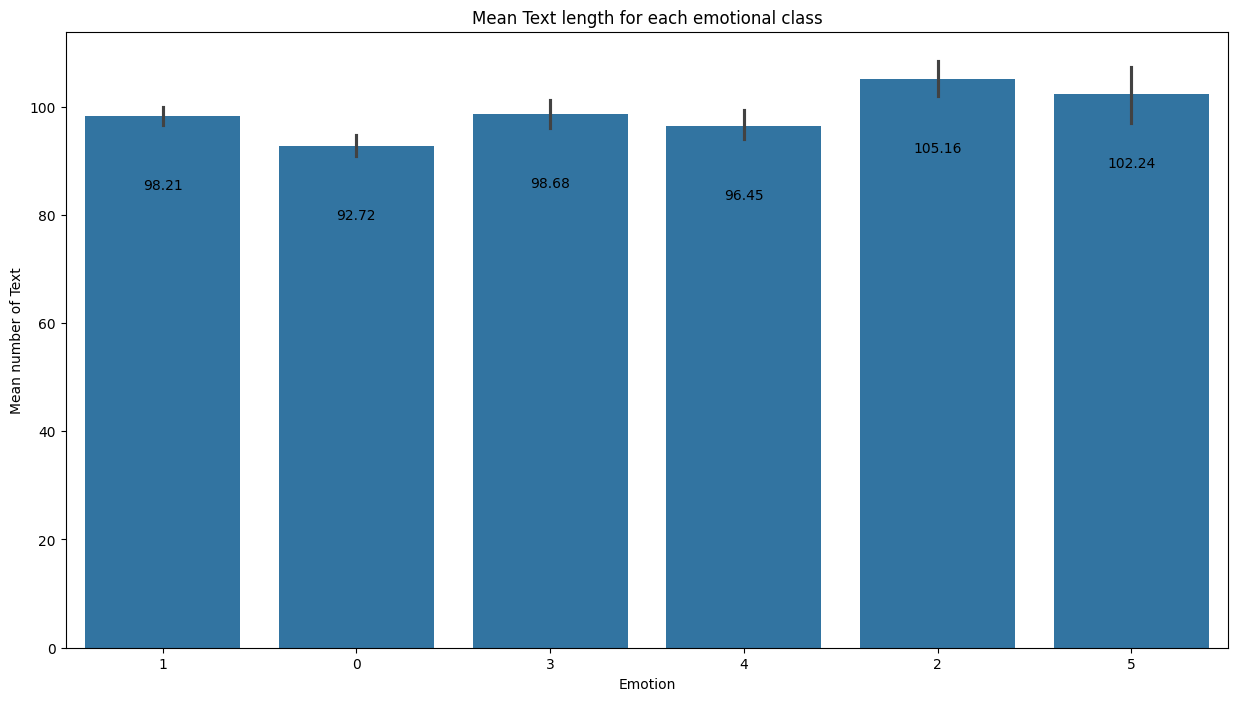

In [19]:
show_barplot_group(data = emotional_text,
                   x_column = 'emotion',
                   y_column = 'text_len',
                   estimator = np.mean,
                   order = list(emotional_text['emotion'].value_counts().index),
                   name_xlabel = 'Emotion',
                   name_ylabel = 'Mean number of Text',
                   name_title = 'Mean Text length for each emotional class')

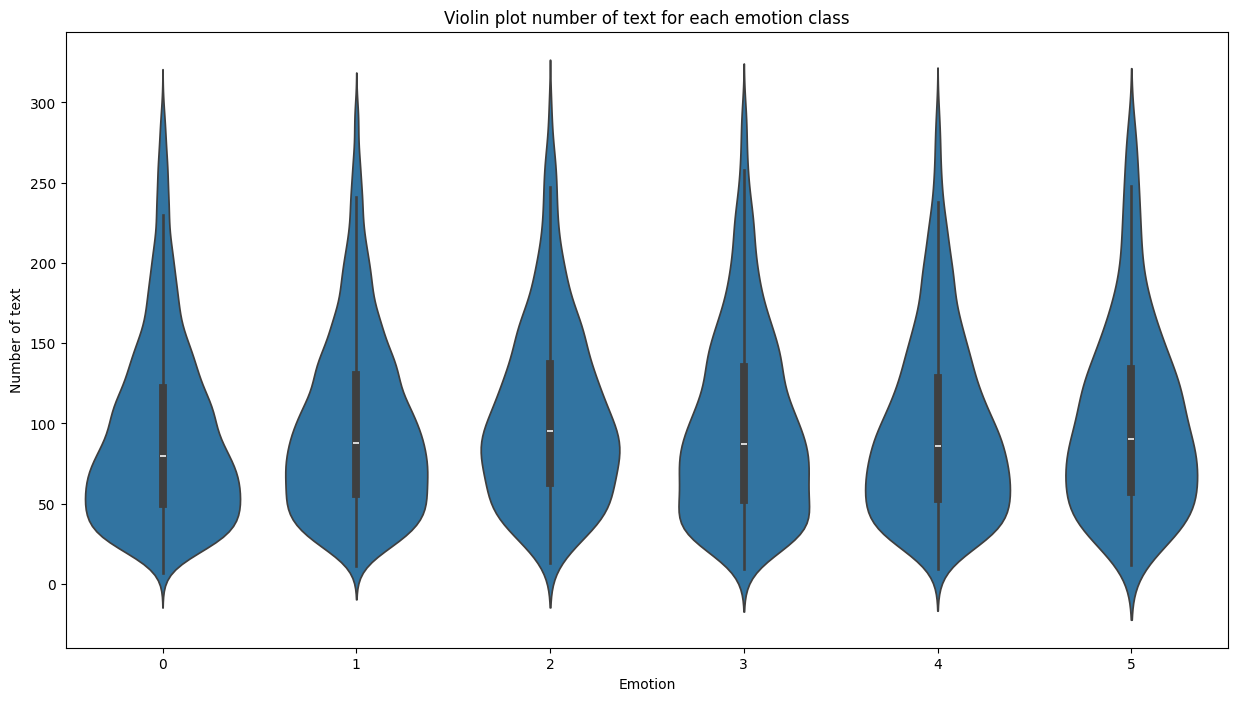

In [20]:
show_violin_plot(data = emotional_text,
                 x_column = 'emotion',
                 y_column = 'text_len',
                 name_xlabel = 'Emotion',
                 name_ylabel = 'Number of text',
                 name_title = 'Violin plot number of text for each emotion class')

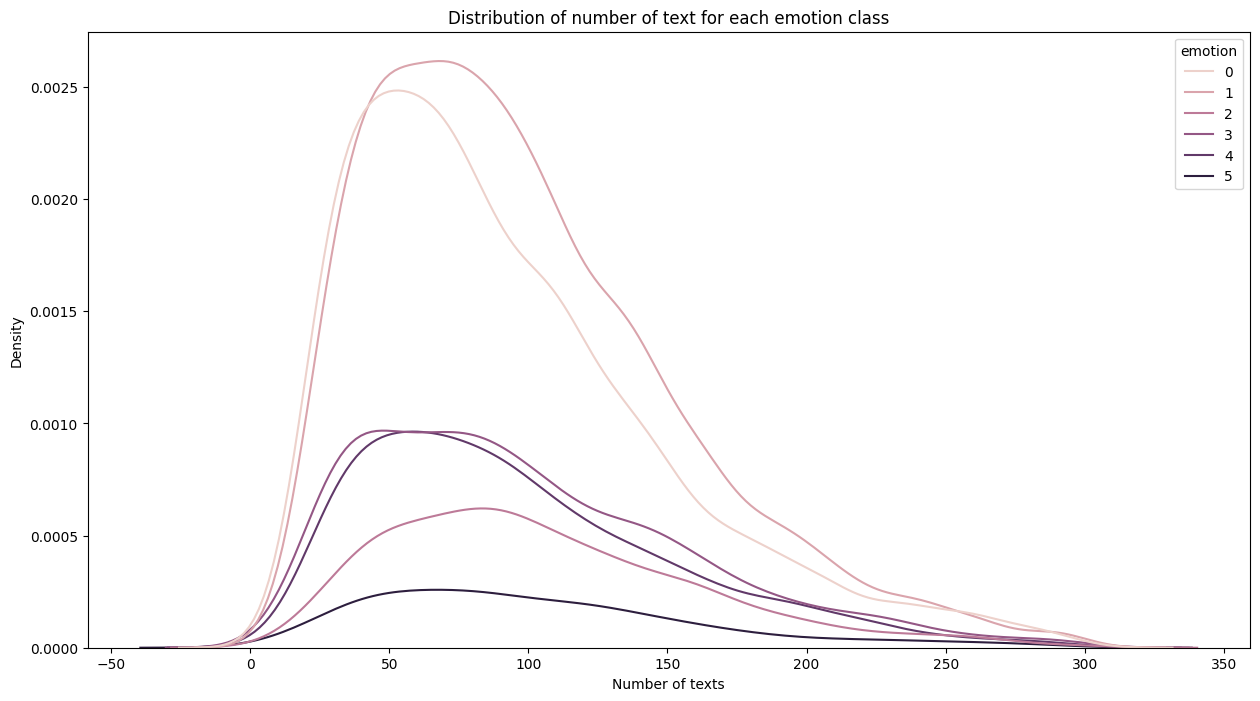

In [21]:
show_KDE_plot(data = emotional_text,
              x_column = "text_len",
              hue_column = "emotion",
              name_xlabel = "Number of texts",
              name_title = "Distribution of number of text for each emotion class")

## 4.3- Statistic about number of words in content (content word counts) for each emotion class

In [22]:
emotional_text["text_num_words"] = emotional_text[0].apply(lambda x: len(x.split()))
emotional_text.head()

,0,emotion,text_len,text_num_words
0,im feeling abit grouchy with kim,3,32,6
1,i just feel like being selfish and really live...,3,54,11
2,i spent some time at the school yesterday talk...,5,244,47
3,i pray that you feel the presence of god aroun...,1,158,34
4,i do like riding on brooms but there is someth...,1,141,27


In [23]:
emotional_text.groupby('emotion')['text_num_words'].describe()

,count,mean,std,min,25%,50%,75%,max
emotion,,,,,,,,
0,3733.0,18.372890,11.043334,2.0,10.0,16.0,24.0,61.0
1,4290.0,19.457576,10.777068,2.0,11.0,18.0,26.0,64.0
2,1043.0,20.936721,10.886953,3.0,13.0,19.0,27.0,63.0
3,1727.0,19.617255,11.512148,2.0,10.0,17.0,26.0,62.0
4,1550.0,18.901935,11.003641,2.0,10.0,17.0,25.0,60.0
5,457.0,20.017505,11.259680,3.0,11.0,18.0,26.0,60.0


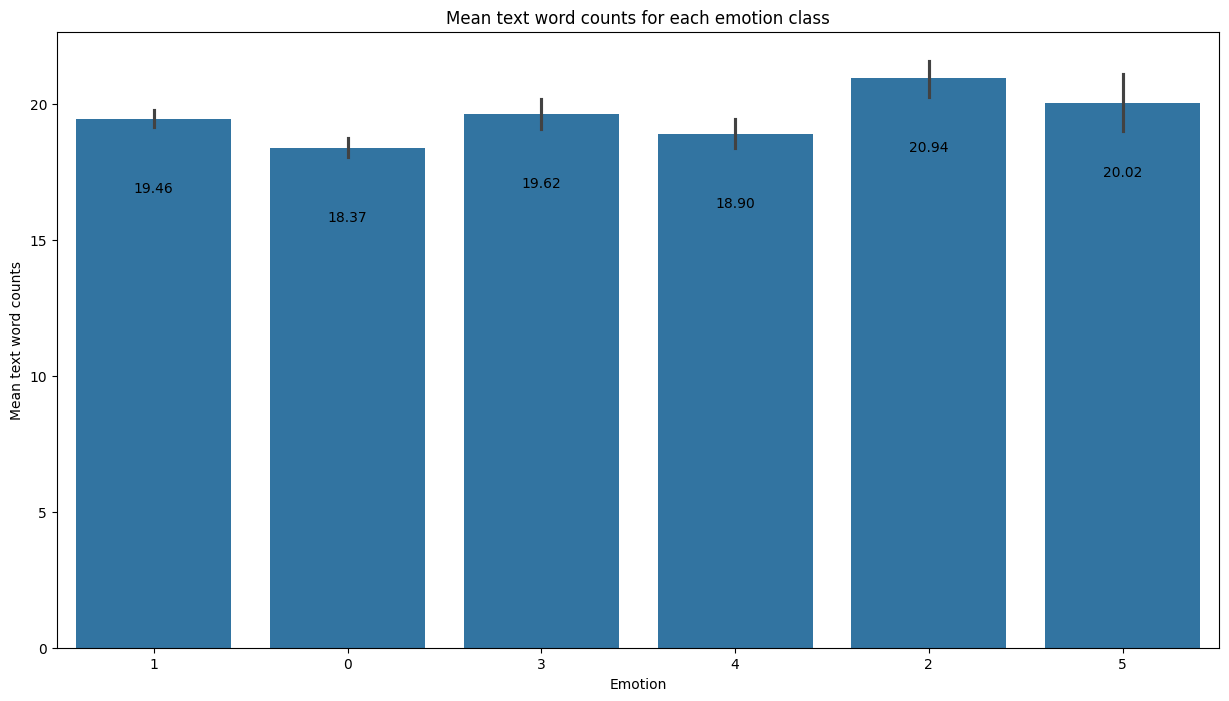

In [24]:
show_barplot_group(data = emotional_text,
                   x_column = 'emotion',
                   y_column = 'text_num_words',
                   estimator = np.mean,
                   order = list(emotional_text['emotion'].value_counts().index),
                   name_xlabel = 'Emotion',
                   name_ylabel = 'Mean text word counts',
                   name_title = 'Mean text word counts for each emotion class')

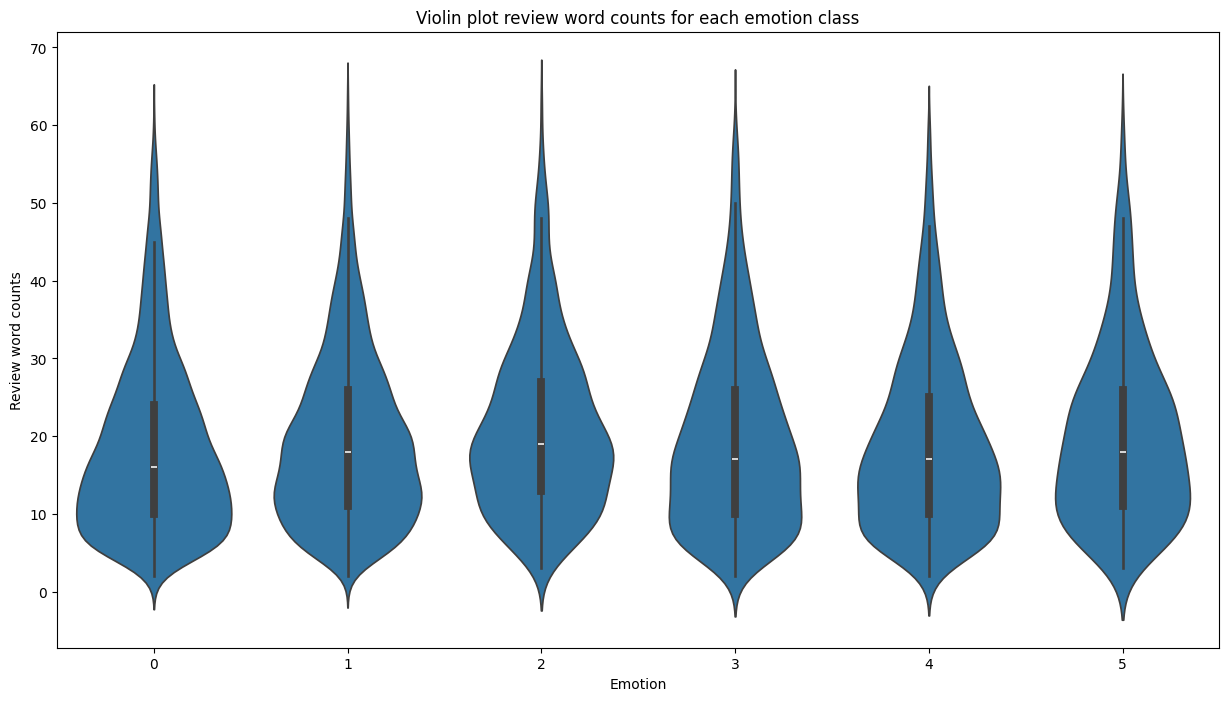

In [25]:
show_violin_plot(data = emotional_text,
                 x_column = 'emotion',
                 y_column = 'text_num_words',
                 name_xlabel = 'Emotion',
                 name_ylabel = 'Review word counts',
                 name_title = 'Violin plot review word counts for each emotion class')

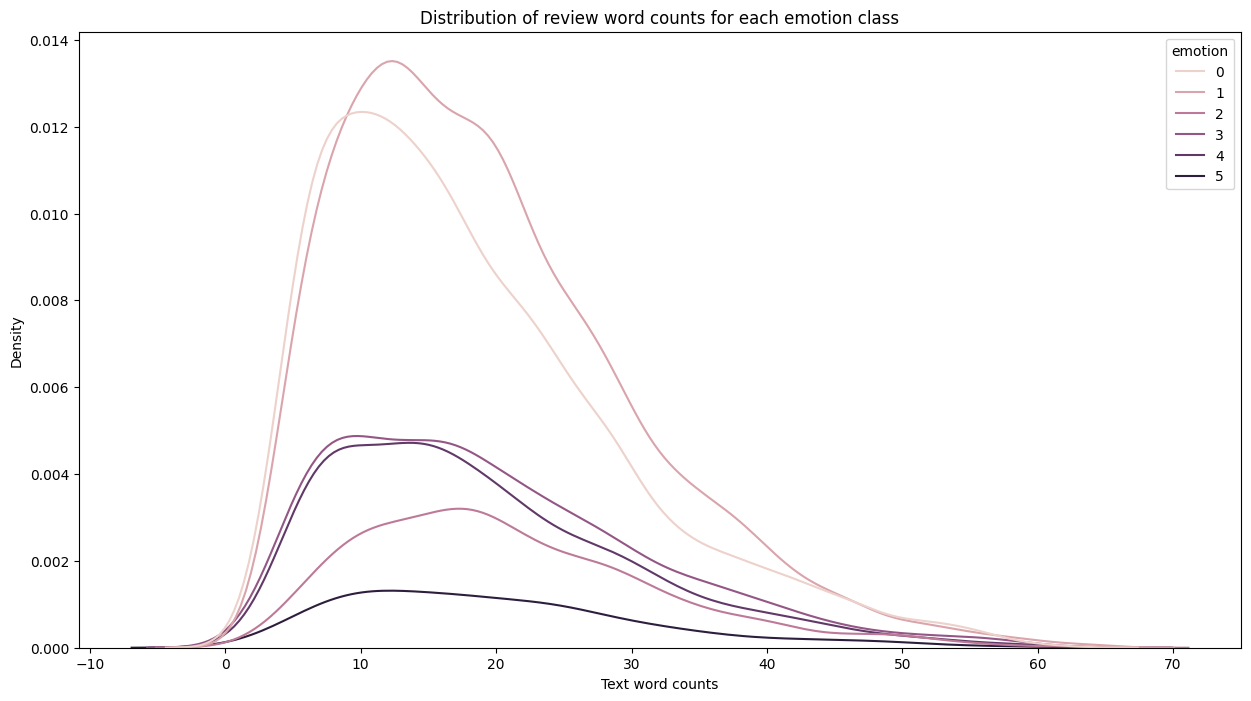

In [26]:
show_KDE_plot(data = emotional_text,
              x_column = "text_num_words",
              hue_column = "emotion",
              name_xlabel = "Text word counts",
              name_title = "Distribution of review word counts for each emotion class")

## 4.4 Statistic about average content word length for each emotion class

In [27]:
text_data_word_information = emotional_text.groupby('emotion')[['text_len', 'text_num_words']].sum()
text_data_word_information['average_word_length'] = text_data_word_information['text_len'] / text_data_word_information['text_num_words']
text_data_word_information

,text_len,text_num_words,average_word_length
emotion,,,
0,346112,68586,5.046394
1,421331,83473,5.047512
2,109685,21837,5.022897
3,170413,33879,5.030048
4,149501,29298,5.102772
5,46723,9148,5.107455


In [28]:
text_data_word_information.describe().T

,count,mean,std,min,25%,50%,75%,max
text_len,6.0,207294.166667,144977.982070,46723.000000,119639.000000,159957.000000,302187.250000,421331.000000
text_num_words,6.0,41036.833333,28755.350469,9148.000000,23702.250000,31588.500000,59909.250000,83473.000000
average_word_length,6.0,5.059513,0.036592,5.022897,5.034135,5.046953,5.088957,5.107455


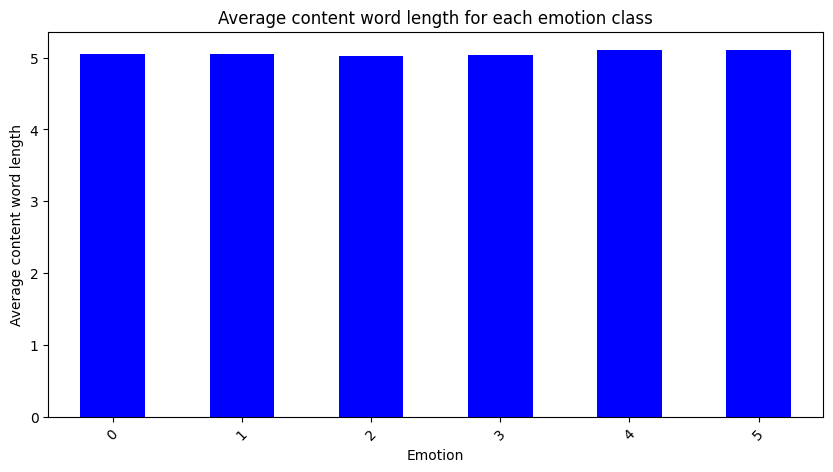

In [29]:
show_barplot_individual(data = text_data_word_information,
                        column = "average_word_length",
                        name_xlabel = "Emotion",
                        name_ylabel = "Average content word length",
                        name_title = "Average content word length for each emotion class")

# **5. Preprocess data**


##5.1- Helper function

In [30]:
def count_have_string(text, tags):
    words = text.lower().split()
    return sum(words.count(tag) for tag in tags)

def remove_list_string(text, tags):
    words = text.lower().split()
    words = [word for word in words if word not in tags]  # Xóa từ nếu nó có trong danh sách thẻ
    return " ".join(words)

def remove_from_substring(text, s):
    index = text.find(s)  # Find the position of s
    if index != -1:
        return text[:index].rstrip()  # Keep only the part before s and remove trailing spaces
    return text.rstrip()  # Return original if s is not found, also removing trailing spaces

def count_words_after(text, s):
    index = text.find(s)  # Find the position of s
    if index == -1:
        return 0  # Return 0 if s is not found
    after_s = text[index + len(s):].strip()  # Get the text after s
    return len(after_s.split())  # Count the words after s

##5.2- Create text_clean columns

In [31]:
emotional_text['text_clean'] = emotional_text[0].copy()
emotional_text_public_test['text_clean'] = emotional_text_public_test[0].copy()

In [32]:
emotional_text

,0,emotion,text_len,text_num_words,text_clean
0,im feeling abit grouchy with kim,3,32,6,im feeling abit grouchy with kim
1,i just feel like being selfish and really live...,3,54,11,i just feel like being selfish and really live...
2,i spent some time at the school yesterday talk...,5,244,47,i spent some time at the school yesterday talk...
3,i pray that you feel the presence of god aroun...,1,158,34,i pray that you feel the presence of god aroun...
4,i do like riding on brooms but there is someth...,1,141,27,i do like riding on brooms but there is someth...
...,...,...,...,...,...
12795,i can think of to quit are not based on my own...,4,235,43,i can think of to quit are not based on my own...
12796,i believe people who use fulsome manners only ...,0,158,31,i believe people who use fulsome manners only ...
12797,i secretly well i guess not secretly anymore f...,4,157,30,i secretly well i guess not secretly anymore f...
12798,i to feel unloved when hes god and he has the ...,0,76,17,i to feel unloved when hes god and he has the ...


In [33]:
emotional_text_public_test

,0,text_clean
0,i guess i could have done so many things befor...,i guess i could have done so many things befor...
1,i was still feeling distraught about the lack ...,i was still feeling distraught about the lack ...
2,i feel for peter he was convinced of his unwor...,i feel for peter he was convinced of his unwor...
3,i know that right before going into the psych ...,i know that right before going into the psych ...
4,i was feeling pretty good about the day ahead ...,i was feeling pretty good about the day ahead ...
...,...,...
995,i believe that im love i believe that youre lo...,i believe that im love i believe that youre lo...
996,i generally refrain from putting friends bands...,i generally refrain from putting friends bands...
997,i sensed such a feeling when i understood i wa...,i sensed such a feeling when i understood i wa...
998,i feel like ive been tortured in my sleep late...,i feel like ive been tortured in my sleep late...


## 5.3 Information about embedded link

### 5.3.1 - Do with training dataset

We proceed to process the documents with string `http`. We can confirm that all properties of HTTP link at the end of the sentence.

In [34]:
record_having_HTTP_tags = emotional_text['text_clean'].apply(lambda x: count_have_string(x, ["http"]))
emotional_text[record_having_HTTP_tags > 0]

,0,emotion,text_len,text_num_words,text_clean
15,i feel honoured to be asked thanks a href http...,1,67,11,i feel honoured to be asked thanks a href http...
92,i feel cdm flac custodes title alibi how much ...,1,150,28,i feel cdm flac custodes title alibi how much ...
119,im feeling funny a href http,5,28,6,im feeling funny a href http
132,i havent hopped on one yet but i definitely wi...,1,145,27,i havent hopped on one yet but i definitely wi...
149,i feel foolish amazed and yet i feel foolish a...,0,62,13,i feel foolish amazed and yet i feel foolish a...
...,...,...,...,...,...
12258,i i feel for you rel nofollow add to delicious...,1,62,14,i i feel for you rel nofollow add to delicious...
12360,i feel so empty a href http uwilnevrknow,0,40,8,i feel so empty a href http uwilnevrknow
12616,i didnt even have time to feel jealous i was s...,3,110,22,i didnt even have time to feel jealous i was s...
12708,i confused my feelings with the truth because ...,2,295,63,i confused my feelings with the truth because ...


However, we can only be sure with links that have only not exceed 1 layer (That is, only not exceed 1 word after `http`). Now, we need to list all links have exceed 1 layer

In [35]:
record_number_words_HTTP_follow = emotional_text[record_having_HTTP_tags > 0]['text_clean'].apply(lambda x: count_words_after(x, "http"))
emotional_text[record_having_HTTP_tags > 0][record_number_words_HTTP_follow > 1]

,0,emotion,text_len,text_num_words,text_clean
2691,ive made my feelings about people who are stil...,2,114,21,ive made my feelings about people who are stil...
2704,i a href http feeling groggy,0,28,6,i a href http feeling groggy
6159,i did this all a href http feeling groggy,0,41,9,i did this all a href http feeling groggy


In this case, all sentences only have 2 words after the word `http` and 2 words have the meaning of the sentence $\rightarrow$ Only delete word `http` in this case.

In [36]:
emotional_text.loc[(record_having_HTTP_tags > 0) & (record_number_words_HTTP_follow > 1), 'text_clean'] = emotional_text[record_having_HTTP_tags > 0][record_number_words_HTTP_follow > 1]['text_clean'].apply(lambda x: remove_list_string(x, ["http"]))

In [37]:
emotional_text[record_having_HTTP_tags > 0]

,0,emotion,text_len,text_num_words,text_clean
15,i feel honoured to be asked thanks a href http...,1,67,11,i feel honoured to be asked thanks a href http...
92,i feel cdm flac custodes title alibi how much ...,1,150,28,i feel cdm flac custodes title alibi how much ...
119,im feeling funny a href http,5,28,6,im feeling funny a href http
132,i havent hopped on one yet but i definitely wi...,1,145,27,i havent hopped on one yet but i definitely wi...
149,i feel foolish amazed and yet i feel foolish a...,0,62,13,i feel foolish amazed and yet i feel foolish a...
...,...,...,...,...,...
12258,i i feel for you rel nofollow add to delicious...,1,62,14,i i feel for you rel nofollow add to delicious...
12360,i feel so empty a href http uwilnevrknow,0,40,8,i feel so empty a href http uwilnevrknow
12616,i didnt even have time to feel jealous i was s...,3,110,22,i didnt even have time to feel jealous i was s...
12708,i confused my feelings with the truth because ...,2,295,63,i confused my feelings with the truth because ...


In not, all sentences only have 0 or 1 word after the word `http` and this word have not the meaning of the sentence $\rightarrow$ Delete word `http` and the following of the sentence.

In [38]:
emotional_text.loc[(record_having_HTTP_tags > 0) & (record_number_words_HTTP_follow <= 1), 'text_clean'] = emotional_text[record_having_HTTP_tags > 0][record_number_words_HTTP_follow <= 1]['text_clean'].apply(lambda x: remove_from_substring(x, "http"))

In [39]:
emotional_text[record_having_HTTP_tags > 0]

,0,emotion,text_len,text_num_words,text_clean
15,i feel honoured to be asked thanks a href http...,1,67,11,i feel honoured to be asked thanks a href
92,i feel cdm flac custodes title alibi how much ...,1,150,28,i feel cdm flac custodes title alibi how much ...
119,im feeling funny a href http,5,28,6,im feeling funny a href
132,i havent hopped on one yet but i definitely wi...,1,145,27,i havent hopped on one yet but i definitely wi...
149,i feel foolish amazed and yet i feel foolish a...,0,62,13,i feel foolish amazed and yet i feel foolish a...
...,...,...,...,...,...
12258,i i feel for you rel nofollow add to delicious...,1,62,14,i i feel for you rel nofollow add to delicious...
12360,i feel so empty a href http uwilnevrknow,0,40,8,i feel so empty a href
12616,i didnt even have time to feel jealous i was s...,3,110,22,i didnt even have time to feel jealous i was s...
12708,i confused my feelings with the truth because ...,2,295,63,i confused my feelings with the truth because ...


Do similarity with `https`

In [40]:
record_having_HTTPS_tags = emotional_text['text_clean'].apply(lambda x: count_have_string(x, ["https"]))
emotional_text[record_having_HTTPS_tags > 0]

,0,emotion,text_len,text_num_words,text_clean
2238,im feeling generous lets make it a a href http...,2,51,11,im feeling generous lets make it a a href http...
5592,i was feeling very energetic yesterday i decid...,1,78,15,i was feeling very energetic yesterday i decid...
6422,i will be able to let that passion out but at ...,1,154,31,i will be able to let that passion out but at ...
7258,im feeling pretty good now and ignoring the fa...,1,114,22,im feeling pretty good now and ignoring the fa...
7343,i got this very sexy latex outfit from their l...,2,156,31,i got this very sexy latex outfit from their l...


In this case, all sentences only have 1 word after the word `https` and this word have not the meaning of the sentence $\rightarrow$ Only delete word `https` and the following of the sentence.

In [41]:
emotional_text[record_having_HTTPS_tags > 0]['text_clean'].apply(lambda x: remove_from_substring(x, "https"))

,text_clean
2238,im feeling generous lets make it a a href
5592,i was feeling very energetic yesterday i decid...
6422,i will be able to let that passion out but at ...
7258,im feeling pretty good now and ignoring the fa...
7343,i got this very sexy latex outfit from their l...


In [42]:
emotional_text.loc[record_having_HTTPS_tags > 0, 'text_clean'] = emotional_text[record_having_HTTPS_tags > 0]['text_clean'].apply(lambda x: remove_from_substring(x, "https"))

In [43]:
emotional_text[record_having_HTTPS_tags > 0]

,0,emotion,text_len,text_num_words,text_clean
2238,im feeling generous lets make it a a href http...,2,51,11,im feeling generous lets make it a a href
5592,i was feeling very energetic yesterday i decid...,1,78,15,i was feeling very energetic yesterday i decid...
6422,i will be able to let that passion out but at ...,1,154,31,i will be able to let that passion out but at ...
7258,im feeling pretty good now and ignoring the fa...,1,114,22,im feeling pretty good now and ignoring the fa...
7343,i got this very sexy latex outfit from their l...,2,156,31,i got this very sexy latex outfit from their l...


Do similarity with `link`

In [44]:
record_having_link_tags = emotional_text['text_clean'].apply(lambda x: count_have_string(x, ["link"]))
emotional_text[record_having_link_tags > 0]

,0,emotion,text_len,text_num_words,text_clean
845,i think for myself i feel everyone is greedy b...,3,277,53,i think for myself i feel everyone is greedy b...
960,i have omitted the link to this article as i f...,3,140,27,i have omitted the link to this article as i f...
1458,im feeling generous today heres the link,1,40,7,im feeling generous today heres the link
2972,i feel a strange connection to them a familiar...,5,98,19,i feel a strange connection to them a familiar...
3229,i will be thinking of each one of you i will b...,1,156,31,i will be thinking of each one of you i will b...
3829,i feel safe encoding utf locale en isprivate f...,1,221,33,i feel safe encoding utf locale en isprivate f...
4610,i feel a divine calling to become an lsd chemi...,1,115,21,i feel a divine calling to become an lsd chemi...
5678,i can understand feeling uncertain about the a...,4,53,9,i can understand feeling uncertain about the a...
7922,i feel embarassed humiliated sad miserable a t...,0,106,19,i feel embarassed humiliated sad miserable a t...
8220,i feel horrible and i would prefer to extend m...,0,104,18,i feel horrible and i would prefer to extend m...


Only row `3229`, `4610`, `8412`, `9266` have embedded link. We need to remove all the text from `link` to the end.

In [45]:
emotional_text.loc[[3229, 4610, 8412, 9266], 'text_clean'] = emotional_text.iloc[[3229, 4610, 8412, 9266]]['text_clean'].apply(lambda x: remove_from_substring(x, 'link'))

In [46]:
emotional_text[record_having_link_tags > 0]

,0,emotion,text_len,text_num_words,text_clean
845,i think for myself i feel everyone is greedy b...,3,277,53,i think for myself i feel everyone is greedy b...
960,i have omitted the link to this article as i f...,3,140,27,i have omitted the link to this article as i f...
1458,im feeling generous today heres the link,1,40,7,im feeling generous today heres the link
2972,i feel a strange connection to them a familiar...,5,98,19,i feel a strange connection to them a familiar...
3229,i will be thinking of each one of you i will b...,1,156,31,i will be thinking of each one of you i will b...
3829,i feel safe encoding utf locale en isprivate f...,1,221,33,i feel safe encoding utf locale en isprivate f...
4610,i feel a divine calling to become an lsd chemi...,1,115,21,i feel a divine calling to become an lsd chemi...
5678,i can understand feeling uncertain about the a...,4,53,9,i can understand feeling uncertain about the a...
7922,i feel embarassed humiliated sad miserable a t...,0,106,19,i feel embarassed humiliated sad miserable a t...
8220,i feel horrible and i would prefer to extend m...,0,104,18,i feel horrible and i would prefer to extend m...


Summary, we have the data after cleaning by removing some embedded links

In [47]:
emotional_text[(record_having_HTTP_tags > 0) | (record_having_HTTPS_tags > 0)]

,0,emotion,text_len,text_num_words,text_clean
15,i feel honoured to be asked thanks a href http...,1,67,11,i feel honoured to be asked thanks a href
92,i feel cdm flac custodes title alibi how much ...,1,150,28,i feel cdm flac custodes title alibi how much ...
119,im feeling funny a href http,5,28,6,im feeling funny a href
132,i havent hopped on one yet but i definitely wi...,1,145,27,i havent hopped on one yet but i definitely wi...
149,i feel foolish amazed and yet i feel foolish a...,0,62,13,i feel foolish amazed and yet i feel foolish a...
...,...,...,...,...,...
12258,i i feel for you rel nofollow add to delicious...,1,62,14,i i feel for you rel nofollow add to delicious...
12360,i feel so empty a href http uwilnevrknow,0,40,8,i feel so empty a href
12616,i didnt even have time to feel jealous i was s...,3,110,22,i didnt even have time to feel jealous i was s...
12708,i confused my feelings with the truth because ...,2,295,63,i confused my feelings with the truth because ...


Next, we list what all the 2 last words of the sentence are.

In [48]:
two_last_words_link = set(emotional_text[(record_having_HTTP_tags > 0) | (record_having_HTTPS_tags > 0)]['text_clean'].apply(lambda x: ' '.join(x.split()[-2:])))

In [49]:
two_last_words_link

{'a href',
 'amp u',
 'author href',
 'blank href',
 'data href',
 'data url',
 'dirty src',
 'dirty srcurl',
 'drinky lemur',
 'feeling groggy',
 'girlfriend href',
 'group hug',
 'height src',
 'imagebox href',
 'img src',
 'item url',
 'javascript src',
 'lunge href',
 'mi src',
 'n href',
 'nofollow href',
 'post count',
 'reddit href',
 'resentful href',
 'script src',
 'share url',
 'stumbleupon src',
 'tranny href',
 'travel href',
 'z href'}

Some 2 last words such as `amp u`, `feeling groggy`, `drinky lemur` can not the last words relevant to the embedded link.

In [50]:
two_last_words_link = two_last_words_link - {'amp u', 'feeling groggy', 'drinky lemur'}
two_last_words_link

{'a href',
 'author href',
 'blank href',
 'data href',
 'data url',
 'dirty src',
 'dirty srcurl',
 'girlfriend href',
 'group hug',
 'height src',
 'imagebox href',
 'img src',
 'item url',
 'javascript src',
 'lunge href',
 'mi src',
 'n href',
 'nofollow href',
 'post count',
 'reddit href',
 'resentful href',
 'script src',
 'share url',
 'stumbleupon src',
 'tranny href',
 'travel href',
 'z href'}

Then, we need to remove respectively by step: `a href` $\rightarrow$ `href` $\rightarrow$ `url` $\rightarrow$ `srcurl` $\rightarrow$ `src` (Careful about the row having `record_number_words_HTTP_follow > 1`, which only remove the string `a href`)

In [51]:
for remove_keywords in [' a href', ' href', ' url', ' srcurl', ' src']:
  emotional_text.loc[((record_having_HTTP_tags > 0) & (record_number_words_HTTP_follow <= 1)) | (record_having_HTTPS_tags > 0), 'text_clean'] = emotional_text[((record_having_HTTP_tags > 0) & (record_number_words_HTTP_follow <= 1)) | (record_having_HTTPS_tags > 0)]['text_clean'].apply(lambda x: remove_from_substring(x, remove_keywords))

In [52]:
emotional_text.loc[(record_having_HTTP_tags > 0) & (record_number_words_HTTP_follow > 1), 'text_clean'] = emotional_text[(record_having_HTTP_tags > 0) & (record_number_words_HTTP_follow > 1)]['text_clean'].apply(lambda x: remove_list_string(x, ["a", "href"]))

In [53]:
emotional_text[(record_having_HTTP_tags > 0) | (record_having_HTTPS_tags > 0)]

,0,emotion,text_len,text_num_words,text_clean
15,i feel honoured to be asked thanks a href http...,1,67,11,i feel honoured to be asked thanks
92,i feel cdm flac custodes title alibi how much ...,1,150,28,i feel cdm flac custodes title alibi how much ...
119,im feeling funny a href http,5,28,6,im feeling funny
132,i havent hopped on one yet but i definitely wi...,1,145,27,i havent hopped on one yet but i definitely wi...
149,i feel foolish amazed and yet i feel foolish a...,0,62,13,i feel foolish amazed and yet i feel foolish
...,...,...,...,...,...
12258,i i feel for you rel nofollow add to delicious...,1,62,14,i i feel for you rel nofollow add to delicious
12360,i feel so empty a href http uwilnevrknow,0,40,8,i feel so empty
12616,i didnt even have time to feel jealous i was s...,3,110,22,i didnt even have time to feel jealous i was s...
12708,i confused my feelings with the truth because ...,2,295,63,i confused my feelings with the truth because ...


In [54]:
emotional_text

,0,emotion,text_len,text_num_words,text_clean
0,im feeling abit grouchy with kim,3,32,6,im feeling abit grouchy with kim
1,i just feel like being selfish and really live...,3,54,11,i just feel like being selfish and really live...
2,i spent some time at the school yesterday talk...,5,244,47,i spent some time at the school yesterday talk...
3,i pray that you feel the presence of god aroun...,1,158,34,i pray that you feel the presence of god aroun...
4,i do like riding on brooms but there is someth...,1,141,27,i do like riding on brooms but there is someth...
...,...,...,...,...,...
12795,i can think of to quit are not based on my own...,4,235,43,i can think of to quit are not based on my own...
12796,i believe people who use fulsome manners only ...,0,158,31,i believe people who use fulsome manners only ...
12797,i secretly well i guess not secretly anymore f...,4,157,30,i secretly well i guess not secretly anymore f...
12798,i to feel unloved when hes god and he has the ...,0,76,17,i to feel unloved when hes god and he has the ...


In [55]:
count_texts_replies_have_embed_link = (emotional_text[0] != emotional_text['text_clean']).sum()
print(f'The number of reviews have embedded links in training test: {count_texts_replies_have_embed_link}')

The number of reviews have embedded links in training test: 156


### 5.3.2 - Do with public test dataset

We proceed to process the documents with string `http`. We can confirm that all properties of HTTP link at the end of the sentence.

In [56]:
record_having_HTTP_tags_public_test = emotional_text_public_test['text_clean'].apply(lambda x: count_have_string(x, ["http"]))
emotional_text_public_test[record_having_HTTP_tags_public_test > 0]

,0,text_clean
5,i feel so amazing and i m so by a href http yo...,i feel so amazing and i m so by a href http yo...
67,i assure you marilla that i feel like praying ...,i assure you marilla that i feel like praying ...
71,i feel sorry for a href http bluestarlight,i feel sorry for a href http bluestarlight
125,i feel so embarrassed and humiliated korean at...,i feel so embarrassed and humiliated korean at...
163,i feel isolated and overwhelmed this lie can c...,i feel isolated and overwhelmed this lie can c...
180,i feel like it title share on reddit reddit a ...,i feel like it title share on reddit reddit a ...
201,i feel perfect with you on facebook href http www,i feel perfect with you on facebook href http www
315,i dolphins feel sweet taste of victory defeat ...,i dolphins feel sweet taste of victory defeat ...
396,i feel a little vain i guess but last time i d...,i feel a little vain i guess but last time i d...
541,i am feeling all nostalgic i went on pinterest...,i am feeling all nostalgic i went on pinterest...


However, we can only be sure with links that have only not exceed 1 layer (That is, only not exceed 1 word after `http`). Now, we need to list all links have exceed 1 layer

In [57]:
record_number_words_HTTP_follow_public_test = emotional_text_public_test[record_having_HTTP_tags_public_test > 0]['text_clean'].apply(lambda x: count_words_after(x, "http"))
emotional_text_public_test[record_having_HTTP_tags_public_test > 0][record_number_words_HTTP_follow_public_test > 1]

,0,text_clean
541,i am feeling all nostalgic i went on pinterest...,i am feeling all nostalgic i went on pinterest...
742,i feel pretty a href http unspokenwords keptin...,i feel pretty a href http unspokenwords keptin...


In this case, all sentences only have 2 words after the word `http` and 2 words have the meaning of the sentence $\rightarrow$ Only delete word `http` in this case.

In [58]:
emotional_text_public_test.loc[(record_having_HTTP_tags_public_test > 0) & (record_number_words_HTTP_follow_public_test > 1), 'text_clean'] = emotional_text_public_test[record_having_HTTP_tags_public_test > 0][record_number_words_HTTP_follow_public_test > 1]['text_clean'].apply(lambda x: remove_list_string(x, ["http"]))

In [59]:
emotional_text_public_test[record_having_HTTP_tags_public_test > 0]

,0,text_clean
5,i feel so amazing and i m so by a href http yo...,i feel so amazing and i m so by a href http yo...
67,i assure you marilla that i feel like praying ...,i assure you marilla that i feel like praying ...
71,i feel sorry for a href http bluestarlight,i feel sorry for a href http bluestarlight
125,i feel so embarrassed and humiliated korean at...,i feel so embarrassed and humiliated korean at...
163,i feel isolated and overwhelmed this lie can c...,i feel isolated and overwhelmed this lie can c...
180,i feel like it title share on reddit reddit a ...,i feel like it title share on reddit reddit a ...
201,i feel perfect with you on facebook href http www,i feel perfect with you on facebook href http www
315,i dolphins feel sweet taste of victory defeat ...,i dolphins feel sweet taste of victory defeat ...
396,i feel a little vain i guess but last time i d...,i feel a little vain i guess but last time i d...
541,i am feeling all nostalgic i went on pinterest...,i am feeling all nostalgic i went on pinterest...


In not, all sentences only have 0 or 1 word after the word `http` and this word have not the meaning of the sentence $\rightarrow$ Delete word `http` and the following of the sentence.

In [60]:
emotional_text_public_test.loc[(record_having_HTTP_tags_public_test > 0) & (record_number_words_HTTP_follow_public_test <= 1), 'text_clean'] = emotional_text_public_test[record_having_HTTP_tags_public_test > 0][record_number_words_HTTP_follow_public_test <= 1]['text_clean'].apply(lambda x: remove_from_substring(x, "http"))

In [61]:
emotional_text_public_test[record_having_HTTP_tags_public_test > 0]

,0,text_clean
5,i feel so amazing and i m so by a href http yo...,i feel so amazing and i m so by a href
67,i assure you marilla that i feel like praying ...,i assure you marilla that i feel like praying ...
71,i feel sorry for a href http bluestarlight,i feel sorry for a href
125,i feel so embarrassed and humiliated korean at...,i feel so embarrassed and humiliated korean at...
163,i feel isolated and overwhelmed this lie can c...,i feel isolated and overwhelmed this lie can c...
180,i feel like it title share on reddit reddit a ...,i feel like it title share on reddit reddit a ...
201,i feel perfect with you on facebook href http www,i feel perfect with you on facebook href
315,i dolphins feel sweet taste of victory defeat ...,i dolphins feel sweet taste of victory defeat ...
396,i feel a little vain i guess but last time i d...,i feel a little vain i guess but last time i d...
541,i am feeling all nostalgic i went on pinterest...,i am feeling all nostalgic i went on pinterest...


Do similarity with `https`

In [62]:
record_having_HTTPS_tags_public_test = emotional_text_public_test['text_clean'].apply(lambda x: count_have_string(x, ["https"]))
emotional_text_public_test[record_having_HTTPS_tags_public_test > 0]

,0,text_clean


Do similarity with `link`

In [63]:
record_having_link_tags_public_test = emotional_text_public_test['text_clean'].apply(lambda x: count_have_string(x, ["link"]))
emotional_text_public_test[record_having_link_tags_public_test > 0]

,0,text_clean


Summary, we have the data after cleaning by removing some embedded links

In [64]:
emotional_text_public_test[record_having_HTTP_tags_public_test > 0]

,0,text_clean
5,i feel so amazing and i m so by a href http yo...,i feel so amazing and i m so by a href
67,i assure you marilla that i feel like praying ...,i assure you marilla that i feel like praying ...
71,i feel sorry for a href http bluestarlight,i feel sorry for a href
125,i feel so embarrassed and humiliated korean at...,i feel so embarrassed and humiliated korean at...
163,i feel isolated and overwhelmed this lie can c...,i feel isolated and overwhelmed this lie can c...
180,i feel like it title share on reddit reddit a ...,i feel like it title share on reddit reddit a ...
201,i feel perfect with you on facebook href http www,i feel perfect with you on facebook href
315,i dolphins feel sweet taste of victory defeat ...,i dolphins feel sweet taste of victory defeat ...
396,i feel a little vain i guess but last time i d...,i feel a little vain i guess but last time i d...
541,i am feeling all nostalgic i went on pinterest...,i am feeling all nostalgic i went on pinterest...


Next, we list what all the 2 last words of the sentence are.

In [65]:
two_last_words_link_public_test = set(emotional_text_public_test[record_having_HTTP_tags_public_test > 0]['text_clean'].apply(lambda x: ' '.join(x.split()[-2:])))

In [66]:
two_last_words_link_public_test

{'a href',
 'blank href',
 'cache ec',
 'facebook href',
 'god href',
 'height src',
 'technorati href',
 'unspokenwords keptinside'}

Some 2 last words such as `cache ec`, `unspokenwords keptinside` can not the last words relevant to the embedded link.

In [67]:
two_last_words_link_public_test = two_last_words_link_public_test - {'cache ec', 'unspokenwords keptinside'}
two_last_words_link_public_test

{'a href',
 'blank href',
 'facebook href',
 'god href',
 'height src',
 'technorati href'}

Then, we need to remove respectively by step: `a href` $\rightarrow$ `href` $\rightarrow$ `url` $\rightarrow$ `srcurl` $\rightarrow$ `src` (Careful about the row having `record_number_words_HTTP_follow_public_test > 1`, which only remove the string `a href`)

In [68]:
for remove_keywords in [' a href', ' href', ' url', ' srcurl', ' src']:
  emotional_text_public_test.loc[(record_having_HTTP_tags_public_test > 0) & (record_number_words_HTTP_follow_public_test <= 1), 'text_clean'] = emotional_text_public_test[(record_having_HTTP_tags_public_test > 0) & (record_number_words_HTTP_follow_public_test <= 1)]['text_clean'].apply(lambda x: remove_from_substring(x, remove_keywords))

In [69]:
emotional_text_public_test.loc[(record_having_HTTP_tags_public_test > 0) & (record_number_words_HTTP_follow_public_test > 1), 'text_clean'] = emotional_text_public_test[(record_having_HTTP_tags_public_test > 0) & (record_number_words_HTTP_follow_public_test > 1)]['text_clean'].apply(lambda x: remove_list_string(x, ["a", "href"]))

In [70]:
emotional_text_public_test[record_having_HTTP_tags_public_test > 0]

,0,text_clean
5,i feel so amazing and i m so by a href http yo...,i feel so amazing and i m so by
67,i assure you marilla that i feel like praying ...,i assure you marilla that i feel like praying ...
71,i feel sorry for a href http bluestarlight,i feel sorry for
125,i feel so embarrassed and humiliated korean at...,i feel so embarrassed and humiliated korean at...
163,i feel isolated and overwhelmed this lie can c...,i feel isolated and overwhelmed this lie can c...
180,i feel like it title share on reddit reddit a ...,i feel like it title share on reddit reddit a ...
201,i feel perfect with you on facebook href http www,i feel perfect with you on facebook
315,i dolphins feel sweet taste of victory defeat ...,i dolphins feel sweet taste of victory defeat ...
396,i feel a little vain i guess but last time i d...,i feel a little vain i guess but last time i d...
541,i am feeling all nostalgic i went on pinterest...,i am feeling all nostalgic i went on pinterest...


Special case: In the row 544, although it dont have `http`, `https` or `link`, it still have `a href` at the end of the sentences. So we need to remove that

In [71]:
emotional_text_public_test.loc[[544], 'text_clean'] = emotional_text_public_test.iloc[[544]]['text_clean'].apply(lambda x: remove_from_substring(x, ' a href'))

In [72]:
emotional_text_public_test.iloc[[544]]

,0,text_clean
544,im still a little mixed on how i feel about hi...,im still a little mixed on how i feel about hi...


In [73]:
count_public_test_texts_replies_have_embed_link = (emotional_text_public_test[0] != emotional_text_public_test['text_clean']).sum()
print(f'The number of reviews have embedded links in public test: {count_public_test_texts_replies_have_embed_link}')

The number of reviews have embedded links in public test: 17


## 5.4 Remove HTML tags

### 5.4.1 - Do with training dataset

We proceed to process the documents with string `target`. We can confirm that all properties of HTTP link at the end of the sentence.

In [74]:
record_having_target_HTML_tags = emotional_text['text_clean'].apply(lambda x: count_have_string(x, ["target"]))
emotional_text[record_having_target_HTML_tags > 0]

,0,emotion,text_len,text_num_words,text_clean
738,i feel i find i felt target blank clasheen by ...,0,87,16,i feel i find i felt target blank clasheen by ...
862,i feel horrible about wanting sonipro amp sour...,0,131,22,i feel horrible about wanting sonipro amp sour...
2231,i feel like an idiot around my friends target ...,0,104,18,i feel like an idiot around my friends target ...
3605,i feel studying and doing homework again after...,0,139,23,i feel studying and doing homework again after...
3754,i feel less bothered my get the rape stick out...,3,146,30,i feel less bothered my get the rape stick out...
4766,i have a feeling we ll see the aftermath of la...,0,93,19,i have a feeling we ll see the aftermath of la...
4954,i feel that the people i have allocated my que...,1,174,29,i feel that the people i have allocated my que...
6900,i feel that the team at target has given me va...,1,160,30,i feel that the team at target has given me va...
7802,i feel like the helpless duckie target for the...,4,107,22,i feel like the helpless duckie target for the...
7897,i feel the sting of the words as a dull ache a...,0,139,28,i feel the sting of the words as a dull ache a...


Only some rows include `[862, 2231, 3605, 4766, 8109, 8409, 9076, 9881]` relevant to HTML tags. All information related to HTML tags at the end of the sentence and begin with `target` or `a target`

In [75]:
for remove_keywords in [' a target', ' target']:
  emotional_text.loc[[862, 2231, 3605, 4766, 8109, 8409, 9076, 9881], 'text_clean'] = emotional_text.loc[[862, 2231, 3605, 4766, 8109, 8409, 9076, 9881], 'text_clean'].apply(lambda x: remove_from_substring(x, remove_keywords))

In [76]:
emotional_text[record_having_target_HTML_tags > 0]

,0,emotion,text_len,text_num_words,text_clean
738,i feel i find i felt target blank clasheen by ...,0,87,16,i feel i find i felt target blank clasheen by ...
862,i feel horrible about wanting sonipro amp sour...,0,131,22,i feel horrible about wanting sonipro amp sour...
2231,i feel like an idiot around my friends target ...,0,104,18,i feel like an idiot around my friends
3605,i feel studying and doing homework again after...,0,139,23,i feel studying and doing homework again after...
3754,i feel less bothered my get the rape stick out...,3,146,30,i feel less bothered my get the rape stick out...
4766,i have a feeling we ll see the aftermath of la...,0,93,19,i have a feeling we ll see the aftermath of la...
4954,i feel that the people i have allocated my que...,1,174,29,i feel that the people i have allocated my que...
6900,i feel that the team at target has given me va...,1,160,30,i feel that the team at target has given me va...
7802,i feel like the helpless duckie target for the...,4,107,22,i feel like the helpless duckie target for the...
7897,i feel the sting of the words as a dull ache a...,0,139,28,i feel the sting of the words as a dull ache a...


We proceed to process the documents with string `rel nofollow`. We delete all substring `rel nofollow`

In [77]:
record_having_rel_nofollow_HTML_tags = emotional_text['text_clean'].apply(lambda x: x.find(' rel nofollow') != -1)
emotional_text[record_having_rel_nofollow_HTML_tags]

,0,emotion,text_len,text_num_words,text_clean
8109,i feel summer session title bookmark at digg r...,0,87,16,i feel summer session title bookmark at digg r...
9076,i feel that i shouldnt be his back up a rel no...,0,112,19,i feel that i shouldnt be his back up a rel no...
9881,i feel the earth move tribute to carole king k...,0,92,16,i feel the earth move tribute to carole king k...
12258,i i feel for you rel nofollow add to delicious...,1,62,14,i i feel for you rel nofollow add to delicious


In [78]:
emotional_text.loc[record_having_rel_nofollow_HTML_tags, 'text_clean'] = emotional_text[record_having_rel_nofollow_HTML_tags]['text_clean'].apply(lambda x: remove_list_string(x, ['rel', 'nofollow']))
emotional_text[record_having_rel_nofollow_HTML_tags]

,0,emotion,text_len,text_num_words,text_clean
8109,i feel summer session title bookmark at digg r...,0,87,16,i feel summer session title bookmark at digg
9076,i feel that i shouldnt be his back up a rel no...,0,112,19,i feel that i shouldnt be his back up a
9881,i feel the earth move tribute to carole king k...,0,92,16,i feel the earth move tribute to carole king k...
12258,i i feel for you rel nofollow add to delicious...,1,62,14,i i feel for you add to delicious


In [79]:
emotional_text[record_having_target_HTML_tags > 0]

,0,emotion,text_len,text_num_words,text_clean
738,i feel i find i felt target blank clasheen by ...,0,87,16,i feel i find i felt target blank clasheen by ...
862,i feel horrible about wanting sonipro amp sour...,0,131,22,i feel horrible about wanting sonipro amp sour...
2231,i feel like an idiot around my friends target ...,0,104,18,i feel like an idiot around my friends
3605,i feel studying and doing homework again after...,0,139,23,i feel studying and doing homework again after...
3754,i feel less bothered my get the rape stick out...,3,146,30,i feel less bothered my get the rape stick out...
4766,i have a feeling we ll see the aftermath of la...,0,93,19,i have a feeling we ll see the aftermath of la...
4954,i feel that the people i have allocated my que...,1,174,29,i feel that the people i have allocated my que...
6900,i feel that the team at target has given me va...,1,160,30,i feel that the team at target has given me va...
7802,i feel like the helpless duckie target for the...,4,107,22,i feel like the helpless duckie target for the...
7897,i feel the sting of the words as a dull ache a...,0,139,28,i feel the sting of the words as a dull ache a...


We proceed to process the documents with string `img`.

In [80]:
record_having_img_HTML_tags = emotional_text['text_clean'].apply(lambda x: count_have_string(x, ["img"]))
emotional_text[record_having_img_HTML_tags > 0]

,0,emotion,text_len,text_num_words,text_clean
92,i feel cdm flac custodes title alibi how much ...,1,150,28,i feel cdm flac custodes title alibi how much ...
282,i am still feeling unhappy and upset about the...,0,126,24,i am still feeling unhappy and upset about the...
525,i keep feeling weird sensations img src http s,4,46,9,i keep feeling weird sensations img
971,i never feel fucked the week after i used some...,3,146,28,i never feel fucked the week after i used some...
2120,i feel really joyful img src http s,1,35,8,i feel really joyful img
2476,i feel they are pretty safe on my blog img src...,1,53,13,i feel they are pretty safe on my blog img
3048,i recommend the jasmine green tea teapot servi...,1,174,32,i recommend the jasmine green tea teapot servi...
4302,i feel greedy about my work img height src htt...,3,54,11,i feel greedy about my work img height
4569,i feel that karma punished me because i don t ...,0,94,19,i feel that karma punished me because i don t ...
4771,i feel fearless janelle mon e elle canada febr...,1,80,15,i feel fearless janelle mon e elle canada febr...


We need to remove all the text from `img` to the end because this substring relevant to the HTML components.

In [81]:
emotional_text.loc[record_having_img_HTML_tags > 0, 'text_clean'] = emotional_text[record_having_img_HTML_tags > 0]['text_clean'].apply(lambda x: remove_from_substring(x, 'img'))
emotional_text[record_having_img_HTML_tags > 0]

,0,emotion,text_len,text_num_words,text_clean
92,i feel cdm flac custodes title alibi how much ...,1,150,28,i feel cdm flac custodes title alibi how much ...
282,i am still feeling unhappy and upset about the...,0,126,24,i am still feeling unhappy and upset about the...
525,i keep feeling weird sensations img src http s,4,46,9,i keep feeling weird sensations
971,i never feel fucked the week after i used some...,3,146,28,i never feel fucked the week after i used some...
2120,i feel really joyful img src http s,1,35,8,i feel really joyful
2476,i feel they are pretty safe on my blog img src...,1,53,13,i feel they are pretty safe on my blog
3048,i recommend the jasmine green tea teapot servi...,1,174,32,i recommend the jasmine green tea teapot servi...
4302,i feel greedy about my work img height src htt...,3,54,11,i feel greedy about my work
4569,i feel that karma punished me because i don t ...,0,94,19,i feel that karma punished me because i don t ...
4771,i feel fearless janelle mon e elle canada febr...,1,80,15,i feel fearless janelle mon e elle canada febr...


We proceed to process the documents with string `div` or `script`.

In [82]:
record_having_div_script_HTML_tags = emotional_text['text_clean'].apply(lambda x: count_have_string(x, ["div", 'script']))
emotional_text[record_having_div_script_HTML_tags > 0]

,0,emotion,text_len,text_num_words,text_clean
258,i feel about mcraven at ut not sure div class ...,1,95,19,i feel about mcraven at ut not sure div class ...
346,im happy to have finished the script s its goo...,0,116,21,im happy to have finished the script s its goo...
981,im just not feeling it at all id much rather s...,3,186,35,im just not feeling it at all id much rather s...
1480,im feeling the moxie fab love cath script src ...,1,54,11,im feeling the moxie fab love cath script
3642,i just have a weird feeling that there was not...,1,125,22,i just have a weird feeling that there was not...
4975,i feel very honored to be on the shortlist and...,1,276,47,i feel very honored to be on the shortlist and...


In row `[258, 981, 1480, 3642, 4975]`, we delete the substring from `div / script` to the end because this substring relevant to the HTML components.

In [83]:
emotional_text.loc[[258, 981, 4975], 'text_clean'] = emotional_text.loc[[258, 981, 4975], 'text_clean'].apply(lambda x: remove_from_substring(x, "div"))
emotional_text.loc[[1480, 3642], 'text_clean'] = emotional_text.loc[[1480, 3642], 'text_clean'].apply(lambda x: remove_from_substring(x, "script"))

In [84]:
emotional_text[record_having_div_script_HTML_tags > 0]

,0,emotion,text_len,text_num_words,text_clean
258,i feel about mcraven at ut not sure div class ...,1,95,19,i feel about mcraven at ut not sure
346,im happy to have finished the script s its goo...,0,116,21,im happy to have finished the script s its goo...
981,im just not feeling it at all id much rather s...,3,186,35,im just not feeling it at all id much rather s...
1480,im feeling the moxie fab love cath script src ...,1,54,11,im feeling the moxie fab love cath
3642,i just have a weird feeling that there was not...,1,125,22,i just have a weird feeling that there was not...
4975,i feel very honored to be on the shortlist and...,1,276,47,i feel very honored to be on the shortlist and...


We proceed to process the documents with string `data` or `iframe`.

In [85]:
record_having_data_iframe_HTML_tags = emotional_text['text_clean'].apply(lambda x: count_have_string(x, ["data", 'iframe']))
emotional_text[record_having_data_iframe_HTML_tags > 0]

,0,emotion,text_len,text_num_words,text_clean
190,i feel very regretful i wasn t able to finish ...,0,84,20,i feel very regretful i wasn t able to finish ...
11198,im feeling generous heres a holiday classic fo...,2,106,16,im feeling generous heres a holiday classic fo...
12016,i can use the data comparatively to determine ...,0,105,17,i can use the data comparatively to determine ...


In row `[190, 11198]`, we delete the substring from `data / iframe` to the end because this substring relevant to the HTML components.

In [86]:
emotional_text.loc[[190], 'text_clean'] = emotional_text.loc[[190], 'text_clean'].apply(lambda x: remove_from_substring(x, "data"))
emotional_text.loc[[11198], 'text_clean'] = emotional_text.loc[[11198], 'text_clean'].apply(lambda x: remove_from_substring(x, "iframe"))

In [87]:
emotional_text[record_having_data_iframe_HTML_tags > 0]

,0,emotion,text_len,text_num_words,text_clean
190,i feel very regretful i wasn t able to finish ...,0,84,20,i feel very regretful i wasn t able to finish ...
11198,im feeling generous heres a holiday classic fo...,2,106,16,im feeling generous heres a holiday classic fo...
12016,i can use the data comparatively to determine ...,0,105,17,i can use the data comparatively to determine ...


We proceed to process the documents with string `style`.

In [88]:
record_having_style_HTML_tags = emotional_text['text_clean'].apply(lambda x: count_have_string(x, ['style']))
emotional_text[record_having_style_HTML_tags > 0]

,0,emotion,text_len,text_num_words,text_clean
79,i feel so dirty in you i crash cars br style b...,0,146,28,i feel so dirty in you i crash cars br style b...
126,i dont know how i feel about it at the moment ...,1,114,25,i dont know how i feel about it at the moment ...
1180,i feel loyal to style,2,21,5,i feel loyal to style
1188,i feel good having defended the sanctity of th...,1,159,27,i feel good having defended the sanctity of th...
1195,i cant shake the im hiding how i feel about my...,1,140,29,i cant shake the im hiding how i feel about my...
1535,i really dont like the whole harvest y time fe...,1,210,41,i really dont like the whole harvest y time fe...
1653,i will say that a little piece of me feels agi...,4,164,32,i will say that a little piece of me feels agi...
2131,i have also known the pain of feeling worthles...,0,108,21,i have also known the pain of feeling worthles...
3101,i hate the way mom and dad are to her i hate t...,1,152,31,i hate the way mom and dad are to her i hate t...
5200,i were any sort of poet i am convinced i would...,1,195,40,i were any sort of poet i am convinced i would...


In row `[79, 1188, 1653, 2131, 6064, 10059, 10877]`, we delete the substring from `br style / li style / span style / style` to the end because this substring relevant to the HTML components. We need to remove respectively by step: `br style` $\rightarrow$ `li style` $\rightarrow$ `span style` $\rightarrow$ `style`.

In [89]:
for remove_keywords in [' br style', ' span style', ' li style', ' style']:
  emotional_text.loc[[79, 1188, 1653, 2131, 6064, 10059, 10877], 'text_clean'] = emotional_text.loc[[79, 1188, 1653, 2131, 6064, 10059, 10877], 'text_clean'].apply(lambda x: remove_from_substring(x, remove_keywords))

In [90]:
emotional_text[record_having_style_HTML_tags > 0]

,0,emotion,text_len,text_num_words,text_clean
79,i feel so dirty in you i crash cars br style b...,0,146,28,i feel so dirty in you i crash cars
126,i dont know how i feel about it at the moment ...,1,114,25,i dont know how i feel about it at the moment ...
1180,i feel loyal to style,2,21,5,i feel loyal to style
1188,i feel good having defended the sanctity of th...,1,159,27,i feel good having defended the sanctity of the
1195,i cant shake the im hiding how i feel about my...,1,140,29,i cant shake the im hiding how i feel about my...
1535,i really dont like the whole harvest y time fe...,1,210,41,i really dont like the whole harvest y time fe...
1653,i will say that a little piece of me feels agi...,4,164,32,i will say that a little piece of me feels agi...
2131,i have also known the pain of feeling worthles...,0,108,21,i have also known the pain of feeling worthles...
3101,i hate the way mom and dad are to her i hate t...,1,152,31,i hate the way mom and dad are to her i hate t...
5200,i were any sort of poet i am convinced i would...,1,195,40,i were any sort of poet i am convinced i would...


We proceed to process the documents with string `rel`.

In [91]:
record_having_rel_HTML_tags = emotional_text['text_clean'].apply(lambda x: count_have_string(x, ['rel']))
emotional_text[record_having_rel_HTML_tags > 0]

,0,emotion,text_len,text_num_words,text_clean
687,i just don t feel thankful rel bookmark some d...,1,109,22,i just don t feel thankful rel bookmark some d...
3829,i feel safe encoding utf locale en isprivate f...,1,221,33,i feel safe encoding utf locale en isprivate f...
4129,i feel unwelcome at work sometimes and think p...,0,205,39,i feel unwelcome at work sometimes and think p...
6360,i feel disgusted c kj rel bookmark class perma...,3,61,11,i feel disgusted c kj rel bookmark class perma...
8220,i feel horrible and i would prefer to extend m...,0,104,18,i feel horrible and i would prefer to extend m...
8307,i feel dirty rel bookmark i feel dirty i feel ...,0,109,21,i feel dirty rel bookmark i feel dirty i feel ...
9326,i feel horrible rel bookmark permalink,0,38,6,i feel horrible rel bookmark permalink
9602,i feel is strange rel bookmark november a href...,5,66,11,i feel is strange rel bookmark november
10090,i feel resentful about my education rel bookma...,3,138,22,i feel resentful about my education rel bookma...
10151,i am feeling romantic on this beautiful summer...,2,74,12,i am feeling romantic on this beautiful summer...


In row `[687, 6360, 8220, 9326, 9602, 10151, 11375, 12027]`, we delete the substring from `rel` to the end because this substring relevant to the HTML components. In row `[4129, 8307, 10090]`, we only delete `rel bookmark`. Special case: In row `[3829]`, we delete substring from `encoding utf` to `xml title`

In [92]:
emotional_text.loc[[687, 6360, 8220, 9326, 9602, 10151, 11375, 12027], 'text_clean'] = emotional_text.loc[[687, 6360, 8220, 9326, 9602, 10151, 11375, 12027], 'text_clean'].apply(lambda x: remove_from_substring(x, 'rel'))
emotional_text.loc[[4129, 8307, 10090], 'text_clean'] = emotional_text.loc[[4129, 8307, 10090], 'text_clean'].apply(lambda x: remove_list_string(x, ['rel', 'bookmark']))
emotional_text.loc[[3829], 'text_clean'] = emotional_text.loc[[3829], 'text_clean'].apply(lambda x: ' '.join(x.split()[:3] + x.split()[25:]))

In [93]:
emotional_text[record_having_rel_HTML_tags > 0]

,0,emotion,text_len,text_num_words,text_clean
687,i just don t feel thankful rel bookmark some d...,1,109,22,i just don t feel thankful
3829,i feel safe encoding utf locale en isprivate f...,1,221,33,i feel safe i could use a standing ovation cou...
4129,i feel unwelcome at work sometimes and think p...,0,205,39,i feel unwelcome at work sometimes and think p...
6360,i feel disgusted c kj rel bookmark class perma...,3,61,11,i feel disgusted c kj
8220,i feel horrible and i would prefer to extend m...,0,104,18,i feel horrible and i would prefer to extend m...
8307,i feel dirty rel bookmark i feel dirty i feel ...,0,109,21,i feel dirty i feel dirty i feel gross poachin...
9326,i feel horrible rel bookmark permalink,0,38,6,i feel horrible
9602,i feel is strange rel bookmark november a href...,5,66,11,i feel is strange
10090,i feel resentful about my education rel bookma...,3,138,22,i feel resentful about my education why i feel...
10151,i am feeling romantic on this beautiful summer...,2,74,12,i am feeling romantic on this beautiful summer...


We proceed to process the documents with string `class`.

In [94]:
record_having_class_HTML_tags = emotional_text['text_clean'].apply(lambda x: count_have_string(x, ['class']))
emotional_text[record_having_class_HTML_tags > 0]

,0,emotion,text_len,text_num_words,text_clean
334,i feel civilly disturbed class delicious title...,0,64,11,i feel civilly disturbed class delicious title...
608,i feel frustrated and upset and demotivated wh...,3,136,24,i feel frustrated and upset and demotivated wh...
1247,i feel a world class player in the benzema mou...,1,67,13,i feel a world class player in the benzema mou...
1406,i told him that college philosophy was not the...,1,130,23,i told him that college philosophy was not the...
1549,i am happier this year in all ways i am just g...,1,291,64,i am happier this year in all ways i am just g...
...,...,...,...,...,...
11873,when we stayed in vienna with our class,4,39,8,when we stayed in vienna with our class
12468,i want to make this a daily thing i have to wa...,1,224,52,i want to make this a daily thing i have to wa...
12533,i was very good in the morning as i had been t...,1,176,39,i was very good in the morning as i had been t...
12676,im so great for having gone to that class feel...,0,152,32,im so great for having gone to that class feel...


In row `[4129, 8412, 9266, 10090, 10915]`, we delete the substring from `i a class / a class / class` to the end because this substring relevant to the HTML components.

In [95]:
for remove_keywords in [' i a class', ' a class', ' class']:
  emotional_text.loc[[4129, 8412, 9266, 10090, 10915], 'text_clean'] = emotional_text.loc[[4129, 8412, 9266, 10090, 10915], 'text_clean'].apply(lambda x: remove_from_substring(x, remove_keywords))

In [96]:
emotional_text[record_having_class_HTML_tags > 0]

,0,emotion,text_len,text_num_words,text_clean
334,i feel civilly disturbed class delicious title...,0,64,11,i feel civilly disturbed class delicious title...
608,i feel frustrated and upset and demotivated wh...,3,136,24,i feel frustrated and upset and demotivated wh...
1247,i feel a world class player in the benzema mou...,1,67,13,i feel a world class player in the benzema mou...
1406,i told him that college philosophy was not the...,1,130,23,i told him that college philosophy was not the...
1549,i am happier this year in all ways i am just g...,1,291,64,i am happier this year in all ways i am just g...
...,...,...,...,...,...
11873,when we stayed in vienna with our class,4,39,8,when we stayed in vienna with our class
12468,i want to make this a daily thing i have to wa...,1,224,52,i want to make this a daily thing i have to wa...
12533,i was very good in the morning as i had been t...,1,176,39,i was very good in the morning as i had been t...
12676,im so great for having gone to that class feel...,0,152,32,im so great for having gone to that class feel...


We proceed to process the documents with string `lt / gt`.

In [97]:
record_having_lt_gt_HTML_tags = emotional_text['text_clean'].apply(lambda x: count_have_string(x, ['lt', 'gt']))
emotional_text[record_having_lt_gt_HTML_tags > 0]

,0,emotion,text_len,text_num_words,text_clean
1995,im not trying to disagree with same sex interc...,4,88,18,im not trying to disagree with same sex interc...
3785,i feel humiliated since a boy has to lead me t...,0,148,30,i feel humiliated since a boy has to lead me t...
4524,ill feel uncomfortable although i always heard...,4,141,23,ill feel uncomfortable although i always heard...
8440,i feel that i was damaged by gt gt gt religion...,0,101,23,i feel that i was damaged by gt gt gt religion...
8510,i am just feel so shy cause i realized those p...,4,96,21,i am just feel so shy cause i realized those p...
11632,i remember that we would always pat my head ah...,2,254,56,i remember that we would always pat my head ah...


We proceed delete all string `lt / gt`

In [98]:
emotional_text.loc[record_having_lt_gt_HTML_tags > 0, 'text_clean'] = emotional_text[record_having_lt_gt_HTML_tags > 0]['text_clean'].apply(lambda x: remove_list_string(x, ['lt', 'gt']))

In [99]:
emotional_text[record_having_lt_gt_HTML_tags > 0]

,0,emotion,text_len,text_num_words,text_clean
1995,im not trying to disagree with same sex interc...,4,88,18,im not trying to disagree with same sex interc...
3785,i feel humiliated since a boy has to lead me t...,0,148,30,i feel humiliated since a boy has to lead me t...
4524,ill feel uncomfortable although i always heard...,4,141,23,ill feel uncomfortable although i always heard...
8440,i feel that i was damaged by gt gt gt religion...,0,101,23,i feel that i was damaged by religion and i wi...
8510,i am just feel so shy cause i realized those p...,4,96,21,i am just feel so shy cause i realized those p...
11632,i remember that we would always pat my head ah...,2,254,56,i remember that we would always pat my head ah...


Special case: In row `8425`, we need to remove `target black download` and row `11402`, we need to remove from `pagetitle` to the end of the sentence

In [100]:
emotional_text.loc[[8425], 'text_clean'] = emotional_text.loc[[8425], 'text_clean'].apply(lambda x: remove_list_string(x, ['target', 'blank', 'download']))
emotional_text.loc[[11402], 'text_clean'] = emotional_text.loc[[11402], 'text_clean'].apply(lambda x: remove_from_substring(x, 'pagetitle'))

In [101]:
emotional_text.loc[[8425, 11402]]

,0,emotion,text_len,text_num_words,text_clean
8425,i feel about target blank download when people...,0,228,46,i feel about when people die how do i feel abo...
11402,i feel the love and i thank you for it pagetit...,1,72,16,i feel the love and i thank you for it


In [102]:
count_text_replies_having_HTML_tags = (emotional_text[0] != emotional_text['text_clean']).sum()
print(f'The number of reviews have HTML tags in training test: {count_text_replies_having_HTML_tags}')

The number of reviews have HTML tags in training test: 183


### 5.4.2 - Do with public test dataset

We proceed to process the documents with string `target`. We can confirm that all properties of HTTP link at the end of the sentence.

In [103]:
record_having_target_HTML_tags_public_test = emotional_text_public_test['text_clean'].apply(lambda x: count_have_string(x, ["target"]))
emotional_text_public_test[record_having_target_HTML_tags_public_test > 0]

,0,text_clean
166,i feel practically virtuous this month i have ...,i feel practically virtuous this month i have ...
180,i feel like it title share on reddit reddit a ...,i feel like it title share on reddit reddit a ...
659,i like to show the homeowners these catalogs t...,i like to show the homeowners these catalogs t...


Only some rows include `[180, 659]` relevant to HTML tags. All information related to HTML tags at the end of the sentence and begin with `target` or `a target`

In [104]:
for remove_keywords in [' a target', ' target']:
  emotional_text_public_test.loc[[180, 659], 'text_clean'] = emotional_text_public_test.loc[[180, 659], 'text_clean'].apply(lambda x: remove_from_substring(x, remove_keywords))

In [105]:
emotional_text_public_test[record_having_target_HTML_tags_public_test > 0]

,0,text_clean
166,i feel practically virtuous this month i have ...,i feel practically virtuous this month i have ...
180,i feel like it title share on reddit reddit a ...,i feel like it title share on reddit reddit
659,i like to show the homeowners these catalogs t...,i like to show the homeowners these catalogs t...


We proceed to process the documents with string `rel nofollow`. We delete all substring `rel nofollow`

In [106]:
record_having_rel_nofollow_HTML_tags_public_test = emotional_text_public_test['text_clean'].apply(lambda x: x.find(' rel nofollow') != -1)
emotional_text_public_test[record_having_rel_nofollow_HTML_tags_public_test]

,0,text_clean
659,i like to show the homeowners these catalogs t...,i like to show the homeowners these catalogs t...


We decide to delete the substring from `a rel nofollow` to the end of the string because all text are relevant to the HTML components.

In [107]:
emotional_text_public_test.loc[record_having_rel_nofollow_HTML_tags_public_test, 'text_clean'] = emotional_text_public_test[record_having_rel_nofollow_HTML_tags_public_test]['text_clean'].apply(lambda x: remove_list_string(x, ['a', 'rel', 'nofollow']))
emotional_text_public_test[record_having_rel_nofollow_HTML_tags_public_test]

,0,text_clean
659,i like to show the homeowners these catalogs t...,i like to show the homeowners these catalogs t...


We proceed to process the documents with string `img`.

In [108]:
record_having_img_HTML_tags_public_test = emotional_text_public_test['text_clean'].apply(lambda x: count_have_string(x, ["img"]))
emotional_text_public_test[record_having_img_HTML_tags_public_test > 0]

,0,text_clean


We proceed to process the documents with string `div` or `script`.

In [109]:
record_having_div_script_HTML_tags_public_test = emotional_text_public_test['text_clean'].apply(lambda x: count_have_string(x, ["div", 'script']))
emotional_text_public_test[record_having_div_script_HTML_tags_public_test > 0]

,0,text_clean
894,i have spent days on the problem i am now feel...,i have spent days on the problem i am now feel...


In row `[894]`, we delete the substring from `div` to the end because this substring relevant to the HTML components.

In [110]:
emotional_text_public_test.loc[[894], 'text_clean'] = emotional_text_public_test.loc[[894], 'text_clean'].apply(lambda x: remove_from_substring(x, "div"))

In [111]:
emotional_text_public_test[record_having_div_script_HTML_tags_public_test > 0]

,0,text_clean
894,i have spent days on the problem i am now feel...,i have spent days on the problem i am now feel...


We proceed to process the documents with string `data` or `iframe`.

In [112]:
record_having_data_iframe_HTML_tags_public_test = emotional_text_public_test['text_clean'].apply(lambda x: count_have_string(x, ["data", 'iframe']))
emotional_text_public_test[record_having_data_iframe_HTML_tags_public_test > 0]

,0,text_clean
758,im feeling nostalgic cant beat the corys ifram...,im feeling nostalgic cant beat the corys ifram...


In row `[758]`, we delete the substring from `iframe` to the end because this substring relevant to the HTML components.

In [113]:
emotional_text_public_test.loc[[758], 'text_clean'] = emotional_text_public_test.loc[[758], 'text_clean'].apply(lambda x: remove_from_substring(x, "iframe"))

In [114]:
emotional_text_public_test[record_having_data_iframe_HTML_tags_public_test > 0]

,0,text_clean
758,im feeling nostalgic cant beat the corys ifram...,im feeling nostalgic cant beat the corys


We proceed to process the documents with string `style`.

In [115]:
record_having_style_HTML_tags_public_test = emotional_text_public_test['text_clean'].apply(lambda x: count_have_string(x, ['style']))
emotional_text_public_test[record_having_style_HTML_tags_public_test > 0]

,0,text_clean
172,i usually increase the font and maybe if i am ...,i usually increase the font and maybe if i am ...
278,im feeling appreciative of the physical world ...,im feeling appreciative of the physical world ...
402,i still feel like i am in the process of learn...,i still feel like i am in the process of learn...
486,i don t always feel like i have amazing style ...,i don t always feel like i have amazing style ...
675,i am a big believer in the phrase that some pe...,i am a big believer in the phrase that some pe...
729,i do see some of the value and ideas in functi...,i do see some of the value and ideas in functi...
916,i firmly believe that you shouldnt have to spe...,i firmly believe that you shouldnt have to spe...


We proceed to process the documents with string `rel`.

In [116]:
record_having_rel_HTML_tags_public_test = emotional_text_public_test['text_clean'].apply(lambda x: count_have_string(x, ['rel']))
emotional_text_public_test[record_having_rel_HTML_tags_public_test > 0]

,0,text_clean


We proceed to process the documents with string `class`.

In [117]:
record_having_class_HTML_tags_public_test = emotional_text_public_test['text_clean'].apply(lambda x: count_have_string(x, ['class']))
emotional_text_public_test[record_having_class_HTML_tags_public_test > 0]

,0,text_clean
15,i leave class feeling more confused every week,i leave class feeling more confused every week
137,i left that day feeling a little dirty and won...,i left that day feeling a little dirty and won...
163,i feel isolated and overwhelmed this lie can c...,i feel isolated and overwhelmed this lie can c...
956,im betraying my youth and class origins here b...,im betraying my youth and class origins here b...


In row `[163]`, we delete the substring from `a class` to the end because this substring relevant to the HTML components.

In [118]:
emotional_text_public_test.loc[[163], 'text_clean'] = emotional_text_public_test.loc[[163], 'text_clean'].apply(lambda x: remove_from_substring(x, ' a class'))

In [119]:
emotional_text_public_test[record_having_class_HTML_tags_public_test > 0]

,0,text_clean
15,i leave class feeling more confused every week,i leave class feeling more confused every week
137,i left that day feeling a little dirty and won...,i left that day feeling a little dirty and won...
163,i feel isolated and overwhelmed this lie can c...,i feel isolated and overwhelmed this lie can c...
956,im betraying my youth and class origins here b...,im betraying my youth and class origins here b...


We proceed to process the documents with string `lt / gt`.

In [120]:
record_having_lt_gt_HTML_tags_public_test = emotional_text_public_test['text_clean'].apply(lambda x: count_have_string(x, ['lt', 'gt']))
emotional_text_public_test[record_having_lt_gt_HTML_tags_public_test > 0]

,0,text_clean
216,i didnt regret anything after bought this and ...,i didnt regret anything after bought this and ...


We proceed delete all string `lt / gt`

In [121]:
emotional_text_public_test.loc[record_having_lt_gt_HTML_tags_public_test > 0, 'text_clean'] = emotional_text_public_test[record_having_lt_gt_HTML_tags_public_test > 0]['text_clean'].apply(lambda x: remove_list_string(x, ['lt', 'gt']))

In [122]:
emotional_text_public_test[record_having_lt_gt_HTML_tags_public_test > 0]

,0,text_clean
216,i didnt regret anything after bought this and ...,i didnt regret anything after bought this and ...


Summary, we have the data after cleaning some HTML tags

In [123]:
emotional_text_public_test[((record_having_HTTP_tags_public_test > 0) | (record_having_HTTPS_tags_public_test > 0))]

,0,text_clean
5,i feel so amazing and i m so by a href http yo...,i feel so amazing and i m so by
67,i assure you marilla that i feel like praying ...,i assure you marilla that i feel like praying ...
71,i feel sorry for a href http bluestarlight,i feel sorry for
125,i feel so embarrassed and humiliated korean at...,i feel so embarrassed and humiliated korean at...
163,i feel isolated and overwhelmed this lie can c...,i feel isolated and overwhelmed this lie can c...
180,i feel like it title share on reddit reddit a ...,i feel like it title share on reddit reddit
201,i feel perfect with you on facebook href http www,i feel perfect with you on facebook
315,i dolphins feel sweet taste of victory defeat ...,i dolphins feel sweet taste of victory defeat ...
396,i feel a little vain i guess but last time i d...,i feel a little vain i guess but last time i d...
541,i am feeling all nostalgic i went on pinterest...,i am feeling all nostalgic i went on pinterest...


In [124]:
count_text_replies_having_HTML_tags_public_test = (emotional_text_public_test[0] != emotional_text_public_test['text_clean']).sum()
print(f'The number of reviews have HTML tags in public test: {count_text_replies_having_HTML_tags_public_test}')

The number of reviews have HTML tags in public test: 19


## 5.5 Full-form and Self-correction

### 5.5.1 Two-word level self-correction

#### 5.5.1.1. Training dataset

In [125]:
# 6244: Recheck
self_correction_two_layer = {
    # Short word / Slang word / Informal word / Possessive word
    ' b c ': ' because ', # done
    ' they re ': ' they are ', # done
    ' can t ': ' can not ', # done
    ' doesn t ': ' does not ', # done
    ' it s ': ' it is ', # done
    ' we re ': ' we are ', # done
    ' shouldn t ': ' should not ', # done
    ' don t ': ' do not ', # done
    ' he s ': ' he is ', # done
    ' she s ': ' she is ', # done
    ' ain t ': ' am not ', # done
    ' i ve ': ' i have ', # done
    ' you re ': ' you are ', # done
    ' hadn t ': ' had not ', # done
    ' isn t ': ' is not ', # done
    ' you ll ': ' you will ', # done
    ' won t ': ' will not ', # done
    ' that s ': ' that is ', # done
    ' you ve ': ' you have ', # done
    ' i ll ': ' i will ', # done --> 2134 and 2328 is a subset
    ' my self ': ' myself ', # done
    ' what s ': ' what is ', # done
    ' there s ': ' there is ', # done
    ' didn t ': ' did not ', # done
    ' couldn t ': ' could not ', # done
    ' might ve ': ' might have ', # done
    ' wouldn t ': ' would not ', # done
    ' b day': ' birthday', # done
    ' they ll ': ' they will ', # done
    ' i d ': ' i ', #??? -> "I had", "I would". Done
    ' i m ': ' i am ', # done --> 4269, 7159, 7766, 10614
    ' who ll ': ' who will ', # done
    ' would ve ': ' would have ', # done
    ' hasn t ': ' has not ', # done
    ' you d ': ' you ', # done
    ' wasn t ': ' was not ', # done
    ' weren t ': ' were not ', # done
    ' haven t ': ' have not ', # done
    ' aren t ': ' are not ', # done
    ' t want t ': ' do not want to ', # done
    ' going t ': ' going to ', # done
    ' wh n ': ' when ', # done
    ' f t ': ' if it is ', # done
    ' habitual t ': ' habitual to ', # done
    ' never want t ': ' never want to ', # done
    ' he ll ': ' he will ', # done
    ' she ll ': ' she will ', # done
    ' there ll ': ' there will ', # done
    ' it ll ': ' it will ', # done
    ' we ll ': ' we will ', # done
    ' that ll ': ' that will ', # done
    ' we ve ': ' we have ', # done
    'i ve ': 'i have ', # done
    ' they ve ': ' they have ', # done
    ' my re ': ' my regarding ', # done
    ' now days ': ' nowadays ', # done
    ' s he ': ' she ', # done
    ' whooooo s ': ' who is ',  # done
    ' s dark ': ' some dark ', # done
    ' s college ': ' some college ', # done
    ' s of ': ' some of ', # done
    ' s trousers ': ' some trousers ', # done
    ' everything s ': ' everything is ', # done
    ' s who ': ' is who ', # done
    ' script s ': ' scripts ', # done
    ' semen s ': ' semen is ', # done
    ' who s ': ' who is ', # done
    ' psycho ing ': ' psychoing ', # done
    ' identity s ': ' identities ', # done
    ' the s and s ': ' ', # Year. Done
    ' the s ': ' ', # Year. Done
    ' s still ': ' is still ', # done
    ' and s lol ': ' and stuff lol ', # done
    ' s been ': ' has been ', # done
    ' their s ': ' their days ', # done
    ' get s ': ' gets ', # done
    ' s also ': ' is also ', # done
    ' s going ': ' is going ', # done
    ' of s ': ' of things ', # done
    ' early s ': ' ', # Year. Done
    # Other of s will be removed
    ' shimmy ing ': ' shimmying ', # Year. Done
    ' special ed ': ' special education ', # Year. Done
    ' f amp ed ': ' fucked ', # Year. Done
    ' we d ': ' we ', # done
    ' he d ': ' he ', # done
    ' it d ': ' it ', # done
    ' they d ': ' they ', # done
    ' d athe ': ' the ', # done
    ' d i ': ' and i ', # done
    ' d anyway ': ' and anyway ', # done
    ' n thn ': ' and then ', # done
    ' n that ': ' and that ', # done
    ' n give ': ' and give ', # done
    ' f bombs ': ' fuck ', # done
    ' mother s ': ' mother ', # done
    ' v and v ': ' version and version ', # done
    ' tgt v u ': ' together with you ', # done
    ' un emo ': ' unemotional ', # done
    ' gud pal ': ' good friend ', # done
    ' w ps ': ' wps ', # done
    ' r or ': ' or ', # done
    ' x mas ': ' christmas ', # done
    ' x com ': ' xcom ', # done
    ' x tremus ': ' xtremus ', # done
    ' x scared ': ' very scared ', # done
    ' x men ': ' xmen ', # done
    ' mentel x core': ' mental and core', # done
    ' b tch ': ' bitch ', # done
    ' lie im ': ' lie in ', # done
    ' im my ': ' in my ', # done
    ' q amp a ': ' question and answer ', # done
    ' harvest y time ': ' harvest my time ', # done
    ' big ol ': ' big old ', # done
    ' him her ': ' him and her ', # done
    ' m ller ': ' muller ', # done
    ' yo girl': ' your girl', # done
    ' a bi ': ' a bit ', # done
    ' abt u dats ur problemn i don think carin for sum ': ' about you that is your problem i do not think caring for someone ', # done
    ' mini t rex': ' mini trex', # done
    ' t shirt': ' tshirt', # done
    ' im my life': ' in my life', # done
    ' lie im ': ' lie in ', # done
    ' p docs ': ' primary care doctors ', # done
    ' am r ': ' am really ', # done
    ' deranged a ': ' deranged as ', # done
    'foward tmr xd cya tmr': 'forward tomorrow see you tomorrow', # done

    # Spam word
    ' la la la la ': ' ', # done
    ' jajaja s': '', # done
    ' yeah yeah yeah x': '', # done
    ' n n n n ': ' and ', # done
    ' t r e e s': ' ', # done

}

In [126]:
for key, value in self_correction_two_layer.items():
    emotional_text['text_clean'] = emotional_text['text_clean'].str.replace(key, value, regex=False)

In [127]:
self_correction_two_layer_stage_two = {
    # Exceptional case
    ' s ': ' ',
    'i m ': 'i am ',
    ' re ': ' re',
    ' planning to d': ' planning to do',
    ' un ': ' un',
    ' a i ': ' i ', # list format
    ' and b ': ' and ', # list format
    ' running because a ': ' running because ', # list format
    ' pre ': ' pre',
    ' don t': ' do not',


    # Non-English word
    ' mi madre ': ' my mother ',
    ' da bul taewuhbeoryeo ': ' burn it all up ', # https://alwaysdreaminghigh.wordpress.com/2014/05/08/lyrics-b-a-p-badman-hangul-romanization-and-english-translation/
    ' niga ulbujitneun nal ': ' it will be the day you cry out ', # https://alwaysdreaminghigh.wordpress.com/2014/05/08/lyrics-b-a-p-badman-hangul-romanization-and-english-translation/
    ' neoneun wiheomhae ': ' you are in danger ', # https://alwaysdreaminghigh.wordpress.com/2014/05/08/lyrics-b-a-p-badman-hangul-romanization-and-english-translation/
    ' gal ttaekkaji gatsseo ': ' you are reached the end ', # https://alwaysdreaminghigh.wordpress.com/2014/05/08/lyrics-b-a-p-badman-hangul-romanization-and-english-translation/
    ' semuanya sudah terlambat ': ' it is too late ', #https://www.musixmatch.com/lyrics/Shidee/Semuanya-Sudah-Terlambat/translation/english
    ' di spazzola prima di andare a dormire ': ' brush before going to sleep ', # Italy
    ' naega deo apaya hae ': ' i should hurt even more ', #https://colorcodedlyrics.com/2014/08/22/jyj-so-so/
    ' dasi neol chajeul su itge ': ' so i can find you again ', #https://colorcodedlyrics.com/2014/08/22/jyj-so-so/
    ' sigani heureulsurok gaseumi apawa ': ' the more time passes the more it hurts ', #https://colorcodedlyrics.com/2014/08/22/jyj-so-so/
    ' dan hanbeon manirado ': ' just one time ', #https://colorcodedlyrics.com/2014/08/22/jyj-so-so/
    ' wo doedollil suman itdamyeon ': ' if only i could turn things back ', #https://colorcodedlyrics.com/2014/08/22/jyj-so-so/
    ' i gotong ttawin naegen ': ' this pain would be ', #https://colorcodedlyrics.com/2014/08/22/jyj-so-so/
    ' barnog ': ' child ',
}

In [128]:
for key, value in self_correction_two_layer_stage_two.items():
    emotional_text['text_clean'] = emotional_text['text_clean'].str.replace(key, value, regex=False)

Then we remove all negative verb string in the end of the string

In [129]:
neg_verbs = {
    'can t': 'can not',
    'didn t': 'did not',
    'hadn t': 'had not',
    'isn t': 'is not',
    'wasn t': 'was not'
}

def remove_neg_verbs_at_the_end(x):
  last_two_word = x.split(' ')[-2:]
  return last_two_word[0] + " " + last_two_word[1] in neg_verbs.keys()

record_having_neg_verbs_at_the_end = emotional_text['text_clean'].apply(lambda x: remove_neg_verbs_at_the_end(x))
emotional_text[record_having_neg_verbs_at_the_end > 0]

,0,emotion,text_len,text_num_words,text_clean
2660,i feel defective because i can t,0,32,7,i feel defective because i can t
6279,i can t help but feeling weird when opening ev...,4,116,24,i can not help but feeling weird when opening ...
6901,i wake up its the uncomfortable feeling i have...,0,198,43,i wake up its the uncomfortable feeling i have...
7656,i feel like there must be more to life than th...,4,75,18,i feel like there must be more to life than th...
9051,i feel like the heartless from kingdom hearts ...,3,192,35,i feel like the heartless from kingdom hearts ...
12187,i should feel bothered that she was spying but...,3,55,12,i should feel bothered that she was spying but...


In [130]:
for key, value in neg_verbs.items():
    emotional_text.loc[record_having_neg_verbs_at_the_end > 0, 'text_clean'] = emotional_text.loc[record_having_neg_verbs_at_the_end > 0, 'text_clean'].str.replace(key, value, regex=False)
emotional_text[record_having_neg_verbs_at_the_end > 0]

,0,emotion,text_len,text_num_words,text_clean
2660,i feel defective because i can t,0,32,7,i feel defective because i can not
6279,i can t help but feeling weird when opening ev...,4,116,24,i can not help but feeling weird when opening ...
6901,i wake up its the uncomfortable feeling i have...,0,198,43,i wake up its the uncomfortable feeling i have...
7656,i feel like there must be more to life than th...,4,75,18,i feel like there must be more to life than th...
9051,i feel like the heartless from kingdom hearts ...,3,192,35,i feel like the heartless from kingdom hearts ...
12187,i should feel bothered that she was spying but...,3,55,12,i should feel bothered that she was spying but...


In [131]:
emotional_text.iloc[[6244]]

,0,emotion,text_len,text_num_words,text_clean
6244,i had seen a solopgangfor to see the love in m...,1,117,26,i had seen a solopgangfor to see the love in m...


#### 5.5.1.2. Public test dataset

In [132]:
self_correction_two_layer_public_test = {
    # Short word / Slang word / Informal word / Possessive word
    ' b c ': ' because ', # done x
    ' they re ': ' they are ', # done x
    ' can t ': ' can not ', # done x
    ' it s ': ' it is ', # done x
    ' shouldn t ': ' should not ', # done x
    ' don t ': ' do not ', # done x
    ' he s ': ' he is ', # done x
    ' i ve ': ' i have ', # done x
    ' hadn t ': ' had not ', # done x
    ' isn t ': ' is not ', # done x
    ' won t ': ' will not ', # done x
    ' that s ': ' that is ', # done x
    ' i ll ': ' i will ', # done x
    ' my self ': ' myself ', # done x
    ' there s ': ' there is ', # done x
    ' didn t ': ' did not ', # done x
    ' couldn t ': ' could not ', # done x
    ' wouldn t ': ' would not ', # done x
    ' i d ': ' i ', #??? -> "I had", "I would". Done x
    ' i m ': ' i am ', # done x
    ' who ll ': ' who will ', # done x
    ' hasn t ': ' has not ', # done x
    ' wasn t ': ' was not ', # done x
    ' weren t ': ' were not ', # done x
    ' haven t ': ' have not ', # done x
    ' i ve ': ' i have ', # done x
    # Other of s will be removed
    ' relax b ': ' relax because ', # done x
    ' pret t y ': ' pretty ', # done x
    ' throw up y ': ' throw up ', # done
    ' yo girl': ' your girl', # done x
    ' fab u lous ': ' fabulous ', # done x
    ' t shirts ': ' tshirts ', # done x
    ' and c ': ' and ', # list format. Done x
    ' groupie shot ': ' group image ', # Done x
}

In [133]:
for key, value in self_correction_two_layer_public_test.items():
    emotional_text_public_test['text_clean'] = emotional_text_public_test['text_clean'].str.replace(key, value, regex=False)

In [134]:
self_correction_two_layer_stage_two = {
    # Exceptional case
    ' s ': ' ',
    ' re ': ' re',
    ' pre ': ' pre',
    'ev er': 'ever',
    'give aways': 'giveaways',
    'a rye': 'awry',
    'at am ': 'at ', # Hour
}

In [135]:
for key, value in self_correction_two_layer_stage_two.items():
    emotional_text_public_test['text_clean'] = emotional_text_public_test['text_clean'].str.replace(key, value, regex=False)

In [136]:
sus3 = ' z '
sus5 = emotional_text_public_test['text_clean'].apply(lambda x: x.find(sus3) != -1)
emotional_text_public_test[sus5]

,0,text_clean


### 5.5.2 One-word level self-correction

#### 5.5.2.1 Training dataset

In [137]:
self_correction = {
    # Long word
    "aaaand": "and", # done
    "aaaaaaand": "and", # done
    "aiiiiighhhht": "right", # done
    "buuuuuut": "but", # done
    "butttt": "but", # done
    "careeeeee": "care", # done
    "craaaaaaack": "crack", # done
    "errrr": "err", # done
    "gooooood": "good", # done
    "happpy": "happy", # done
    "hummpffff": "humpf", # done
    "itttt": "it", # done
    "looooong": "long", # done
    "rrreeaallyy": "really", # done
    "reaaallyyyy": "really", # done
    "sniiiiifff": "sniff", # done
    "soo": "so", # done
    "sooo": "so", # done
    "soooo": "so", # done
    "sooooo": "so", # done
    "soooooooo": "so", # done
    "soooooooooooo": "so", # done
    "sooooooooper": "super", # done
    "todayyy": "today", # done
    "veryy": "very", # done
    "verrrrrrrryyyy": "very", # done
    "waaaaayyyy": "way", # done
    "whooooo": "who", # done
    "whooooos": "who is", # done
    "whooooooooos": "who is", # done
    "whos": "who is", # done
    "yawwwn": "yawn", # done

    # Short word / Slang word / Informal word
    "becuz": "because", # done
    "cuz": "because", # done
    "didnt": "did not", # done
    "doesnt": "does not", # done
    "dunnno": "do not know", # done
    "hw": "how", # done
    "im": "i am", # done
    # "its": "it", # ???: "it is", "it has". Done --> 209, 284, 478, 604, 756, 888, 1574, 2042, 2436, 2806, 3070, 3366, 3603, 4879, 5644, 5723, 5984, 5991, 6477, 6634, 7461,
    #               7688, 7714, 8295, 8934, 9041, 9417, 9528, 10004, 10199, 10661, 10670, 11089, 11388, 11640, 11955, 12102, 12625. Done
    "ive": "i have", # done
    "ppl": "people", # done
    "shalt": "shall", # done
    "wanna": "want", # done --> ##9746. Done
    "wont": "will not", # done
    "youd": "you would", # done
    "couldnt": "could not", # done
    "thru": "through", # done
    "id": "i", # ??? "i would" / "i had". Done
    # "ill": "i will", # done --> 4106, 5746, 8800, 8937, 11946, 12505. Done
    "shes": "she", # ??? "she is" / "she had". Done
    "gonna": "going to", # done
    "gotta": "have got", # done
    "isnt": "is not", # done
    # "cause": "because", # Done --> 434, 654, 873, 1063, 1215, 1381, 1597, 1600, 1780, 3089, 4038, 6376, 7600, 7738, 8941, 9395, 9505, 10183, 10642, 11401, 12150, 12165. Done
    "wouldnt": "would not", # done
    "thats": "that is", # ???: "that is" --> Done
    "werent": "were not", # done
    "makin": "making", # done
    "st": "first", # done
    "dont": "do not", # done
    "cos": "because", # done --> ##4204. Done
    "weve": "we have", # done
    "wasnt": "was not", # done
    "theyd": "they would", # done
    "arent": "are not", # done
    "theyre": "they are", # done
    "dunno": "do not know", # done
    "cant": "can not", # done
    "hes": "he", #??? -> "he is" / "he had". Done
    "shed": "she would", # done
    "theres": "there is", # done
    "aint": "not", #??? -> "am not" / "have not". Done
    "u": "you", # done
    "ur": "your", # done
    "youre": "you are", # done
    "hasnt": "has not", # done
    "coz": "because", # done
    "havent": "have not", # done
    # "doc": "doctor", # done --> 6485. Done
    "rt": "router", # done
    "hadnt": "had not", # done
    "idrc": "i do not really care", # done
    "diy": "do it yourself", # done
    "itd": "it", #??? --> "it had" / "it would". Done
    "youll": "you will", # done
    "lbs": "pound", # done
    "cig": "cigarette", # done
    "ye": "you", # done
    "em": "them", # done
    "whod": "who", #??? -> "who had" / "who did". Done
    "sis": "sister", # done
    "pics": "pictures", # done
    "re": "are", # done
    "rd": "third", # done
    "cus": "because", # done
    "meds": "medications", # done
    "idk": "i do not know", # done
    "fam": "family", # done
    "tryin": "trying", # done
    "pb": "personal best", # done
    "fab": "fabulous", # done
    "bfs": "boyfriends", # done
    "ima": "i am going to", # done
    "effin": "effing", # done
    "runnin": "running", # done
    "bein": "being", # done
    "dun": "do not", # done
    "noe": "know", # done
    "tat": "that", # done
    "thk": "think", # done
    "somebodys": "somebody", #??? -> "somebody's", "somebody has". Done
    "itll": "it will", # done
    "someones": "someone", #??? -> "someone's", "someone has". Done
    "racin": "racing", # done
    "naman": "really", # done
    "til": "until", # done
    "lovin": "loving", # done
    "goin": "going", # done
    "dancin": "dancing", # done
    "cryin": "crying", # done
    "lookin": "looking", # done
    "feelin": "feeling", # done
    "hrs": "hours", # done
    "fuckin": "fucking", # done
    "tbh": "to be honest", # done
    "bt": "but", # done
    "dm": "demo", # done
    "rawr": "roar", # done
    "reps": "repetitions", # done
    "bs": "bullshit", # done
    "gig": "job", # done
    "w": "with", # done
    "fic": "fiction", # done
    "mi": "my", # done
    "drs": "doctor", # done
    "alba": "dawn", # done
    "kinda": "kind of",  # done
    "yk": "you know", # done
    # "lil": "little", # done --> 9456. Done
    "gimme": "give me", # done
    "therell": "there will", # done
    "frickin": "fricking", # done
    "bm": "bad manner", # done
    "uv": "ultraviolet", # done
    "baba": "father", # done
    "bio": "biology", # done
    "ptl": "praise the lord", # done
    "friggin": "frigging", # done
    "yall": "you all", # done
    "sour": "pissed off", # done
    "peeps": "children", # done
    "bfd": "big fucking deal", # done
    "maxs": "max", # Max's. Done
    "ffs": "for fuck sake", # done
    "mermaidhaire": "mermaid hair", # done
    "wantd": "wants", # done
    "neva": "never", # done
    "dorky": "stupid", # done
    "outta": "out of", # done
    "hella": "a lot of", # done
    "info": "information", # done
    "theyll": "they will", # done

    # Stick (Munge) word
    "abit": "a bit", # done
    "eachother": "each other", # done
    "likeaudrey": "like audrey", # done
    "yknow": "you know", # done
    "atleast": "at least", # done
    "gfathers": "grandfathers", # done
    "tget": "to get", # done
    "alot": "a lot", # done
    "andintrupte": "and interrupt", # done
    "livevideo": "live video", # done

    # HTML error / Word error
    "amp": "and", # done
    "ened": "ended", # done
    # "dan": "and", # done --> 9500. Done
    "din": "did not", # done
    "alll": "all", # done
    "beacuse": "because", # done
    "wihtout": "without", # done
    "colomn": "column", # done
    "tha": "the", # done
    "understad": "understand", # done
    # "don": "do not", # done --> 1333. Done
    "takeing": "taking", # done
    "believ": "believe", # done
    "stic": "stick", # done
    "feautures": "features", # done
    "sumthg": "something", # done
    "tody": "today", # done
    "excelent": "excellent", # done
    "lik": "like", # done
    "sic": "sick", # done
    "firs": "first", # done
    "fil": "", # done
    "th": "", # done. Ordinal number
    "nd": "", # done. Ordinal number
    "calle": "called", # done
    "kindda": "kind of", # done
    "hellip": "", # done
    "lone": "one", # done
    "solopgangfor": "sologang for", # done
    "m": "", # done
    "d": "", # done
    "v": "", # done
    "s": "", # done
    "x": "", # done
    "t": "", # done
    "opis": "", # done
    "lavander": "lavender", # done
    "nao": "now", # done
    "pregant": "pregnant", # done
    "ty": "", # done
    "wh": "", # done
    "insyallah": "inshallah", # done
    "tdy": "today", # done
    "whiney": "whiny", # done
    "ytear": "year", # done
    "futrue": "future", # done
    "efeeling": "feeling", # done
    "timesa": "times", # done
    "weighins": "weigh ins", # done
    "afrad": "afraid", # done
    "noticable": "noticeable", # done
    "myelf": "myself", # done
    "phyica": "physical", # done
    "fa": "for", # done

    # Sound and emotion word
    "hmmm": "hmm", # done
    "hmmmmm": "hmm", # done
    "lll": "", # done
    "oooh": "oh", # done
    "psssh": "pssh", # done
    "sighhh": "sigh", # done
    "shhhhhhh": "shh", # done
    "wheeeeee": "whee", # done
    "woooo": "wooooo", # done
    "wooooo": "wooooo", # done
    "xxx": "", # done
    "gawd": "god", # done
    "faux": "fake", # done
    "loosing": "losing", # done
    "particulary": "particularly", # done
    "xd": "", # done
    "xdd": "", # done


    # Spam word
    "rfttttttttttsjiowefmklldkavsvdsbtwrsbdvfocxfibjxrklrgrmvaeridubneosdvfrwfd": "", # done
    "jhbdjhdfbjdfhbfd": "", # done
}

def self_correction_words(text):
    words = text.split()
    reduced_words = [self_correction.get(word, word) for word in words]
    return ' '.join(reduced_words)

In [138]:
emotional_text['text_clean'] = emotional_text['text_clean'].apply(lambda x: self_correction_words(x))

In [139]:
emotional_text

,0,emotion,text_len,text_num_words,text_clean
0,im feeling abit grouchy with kim,3,32,6,i am feeling a bit grouchy with kim
1,i just feel like being selfish and really live...,3,54,11,i just feel like being selfish and really live...
2,i spent some time at the school yesterday talk...,5,244,47,i spent some time at the school yesterday talk...
3,i pray that you feel the presence of god aroun...,1,158,34,i pray that you feel the presence of god aroun...
4,i do like riding on brooms but there is someth...,1,141,27,i do like riding on brooms but there is someth...
...,...,...,...,...,...
12795,i can think of to quit are not based on my own...,4,235,43,i can think of to quit are not based on my own...
12796,i believe people who use fulsome manners only ...,0,158,31,i believe people who use fulsome manners only ...
12797,i secretly well i guess not secretly anymore f...,4,157,30,i secretly well i guess not secretly anymore f...
12798,i to feel unloved when hes god and he has the ...,0,76,17,i to feel unloved when he god and he has the c...


Now, we list all text have word `ill`, that is the short term of `i will` or can have the meaning of `sick / fail` (such as `ill performed`). Some sentences `[4106, 5746, 8800, 8937, 11946, 12505]` have second meaning, that mean we don't change to `i will`

In [140]:
record_having_ill = emotional_text['text_clean'].apply(lambda x: count_have_string(x, ["ill"]))
emotional_text[record_having_ill > 0]

,0,emotion,text_len,text_num_words,text_clean
206,i can pass test two this time round ill feel m...,1,94,20,i can pass test two this time round ill feel m...
362,i think thats exactly how ill be i love my yea...,0,271,54,i think that is exactly how ill be i love my y...
398,ill feel terrible in the end i dont know why i...,0,155,32,ill feel terrible in the end i do not know why...
432,i am feeling very generous today and normally ...,1,108,21,i am feeling very generous today and normally ...
436,ill be whingeing about how much i ache but at ...,1,93,19,ill be whingeing about how much i ache but at ...
...,...,...,...,...,...
12505,i feel the divine envelope me when i watch lit...,1,263,41,i feel the divine envelope me when i watch lit...
12551,ive always felt like ill finish my masters i w...,1,188,35,i have always felt like ill finish my masters ...
12564,i will focus on either an infantry company or ...,1,195,39,i will focus on either an infantry company or ...
12703,i have a few more of these but after taking pi...,0,155,35,i have a few more of these but after taking pi...


In [141]:
# ill at the beginning
emotional_text.loc[list(set(emotional_text[record_having_ill > 0].index) - {4106, 5746, 8800, 8937, 11946, 12505}), 'text_clean'] \
= emotional_text.loc[list(set(emotional_text[record_having_ill > 0].index) - {4106, 5746, 8800, 8937, 11946, 12505}), 'text_clean'].str.replace(r'\bill \b', 'i will ', regex = True)

# ill in the middle of the sentence
emotional_text.loc[list(set(emotional_text[record_having_ill > 0].index) - {4106, 5746, 8800, 8937, 11946, 12505}), 'text_clean'] \
= emotional_text.loc[list(set(emotional_text[record_having_ill > 0].index) - {4106, 5746, 8800, 8937, 11946, 12505}), 'text_clean'].str.replace(' ill ', ' i will ', regex = False)

In [142]:
emotional_text.loc[[4106, 5746, 8800, 8937, 11946, 12505]]

,0,emotion,text_len,text_num_words,text_clean
4106,i also feel devoted to my profession because i...,2,295,51,i also feel devoted to my profession because i...
5746,i act as head of family when he is far too you...,1,251,54,i act as head of family when he is far too you...
8800,i feel sad when i see your son uhuru being per...,0,120,25,i feel sad when i see your son uhuru being per...
8937,my cat died from an illness it had been with u...,0,171,38,my cat died from an illness it had been with u...
11946,i recently had a very ill and premature baby w...,0,82,17,i recently had a very ill and premature baby w...
12505,i feel the divine envelope me when i watch lit...,1,263,41,i feel the divine envelope me when i watch lit...


In [143]:
emotional_text[record_having_ill > 0]

,0,emotion,text_len,text_num_words,text_clean
206,i can pass test two this time round ill feel m...,1,94,20,i can pass test two this time round i will fee...
362,i think thats exactly how ill be i love my yea...,0,271,54,i think that is exactly how i will be i love m...
398,ill feel terrible in the end i dont know why i...,0,155,32,i will feel terrible in the end i do not know ...
432,i am feeling very generous today and normally ...,1,108,21,i am feeling very generous today and normally ...
436,ill be whingeing about how much i ache but at ...,1,93,19,i will be whingeing about how much i ache but ...
...,...,...,...,...,...
12505,i feel the divine envelope me when i watch lit...,1,263,41,i feel the divine envelope me when i watch lit...
12551,ive always felt like ill finish my masters i w...,1,188,35,i have always felt like i will finish my maste...
12564,i will focus on either an infantry company or ...,1,195,39,i will focus on either an infantry company or ...
12703,i have a few more of these but after taking pi...,0,155,35,i have a few more of these but after taking pi...


Now, we list all text have word `cause`, that is the short term of `because` or can have the meaning of `factor / reason` (such as `ill performed`). Some sentences `[434, 654, 873, 1063, 1215, 1381, 1597, 1600, 1780, 3089, 4038, 6376, 7600, 7738, 8941, 9395, 9505, 10183, 10642, 11401, 12150, 12165]` have second meaning, that mean we don't change to `because`

In [144]:
record_having_cause = emotional_text['text_clean'].apply(lambda x: count_have_string(x, ["cause"]))
emotional_text[record_having_cause > 0]

,0,emotion,text_len,text_num_words,text_clean
434,i feel it s a worthwhile cause and hope you de...,1,65,13,i feel it is a worthwhile cause and hope you d...
654,i am offering two original works for immediate...,1,165,31,i am offering two original works for immediate...
743,im feeling all puppy dogs and rainbows when im...,0,231,47,i am feeling all puppy dogs and rainbows when ...
873,i feel like i cause a lot of problems for her ...,1,93,20,i feel like i cause a lot of problems for her ...
1063,ive stamped out old relationships feeling like...,2,166,29,i have stamped out old relationships feeling l...
1215,i might i could not stress to her how importan...,0,160,32,i might i could not stress to her how importan...
1381,i feel like the people who cause pain go throu...,0,182,35,i feel like the people who cause pain go throu...
1597,i felt like talking too but i didn t know what...,0,205,45,i felt like talking too but i did not know wha...
1600,i do this if i allow myself to sit in this cyc...,0,180,39,i do this if i allow myself to sit in this cyc...
1767,i feel funny cause bonka neva thanked me fa hi...,5,54,11,i feel funny cause bonka never thanked me for ...


In [145]:
emotional_text.loc[list(set(emotional_text[record_having_cause > 0].index) - {434, 654, 873, 1063, 1215, 1381, 1597, 1600, 1780, 3089, 4038, 6376, 7600, 7738, 8941, 9395, 9505, 10183, 10642, 11401, 12150, 12165}), 'text_clean'] \
= emotional_text.loc[list(set(emotional_text[record_having_cause > 0].index) - {434, 654, 873, 1063, 1215, 1381, 1597, 1600, 1780, 3089, 4038, 6376, 7600, 7738, 8941, 9395, 9505, 10183, 10642, 11401, 12150, 12165}), 'text_clean'] \
                .str.replace(' cause ', ' because ', regex = False)

In [146]:
emotional_text.loc[[434, 654, 873, 1063, 1215, 1381, 1597, 1600, 1780, 3089, 4038, 6376, 7600, 7738, 8941, 9395, 9505, 10183, 10642, 11401, 12150, 12165]]

,0,emotion,text_len,text_num_words,text_clean
434,i feel it s a worthwhile cause and hope you de...,1,65,13,i feel it is a worthwhile cause and hope you d...
654,i am offering two original works for immediate...,1,165,31,i am offering two original works for immediate...
873,i feel like i cause a lot of problems for her ...,1,93,20,i feel like i cause a lot of problems for her ...
1063,ive stamped out old relationships feeling like...,2,166,29,i have stamped out old relationships feeling l...
1215,i might i could not stress to her how importan...,0,160,32,i might i could not stress to her how importan...
1381,i feel like the people who cause pain go throu...,0,182,35,i feel like the people who cause pain go throu...
1597,i felt like talking too but i didn t know what...,0,205,45,i felt like talking too but i did not know wha...
1600,i do this if i allow myself to sit in this cyc...,0,180,39,i do this if i allow myself to sit in this cyc...
1780,i see anything that would cause me to feel fea...,4,72,14,i see anything that would cause me to feel fea...
3089,i feel it rarely advances any worthwhile cause...,1,160,30,i feel it rarely advances any worthwhile cause...


In [147]:
emotional_text[record_having_cause > 0]

,0,emotion,text_len,text_num_words,text_clean
434,i feel it s a worthwhile cause and hope you de...,1,65,13,i feel it is a worthwhile cause and hope you d...
654,i am offering two original works for immediate...,1,165,31,i am offering two original works for immediate...
743,im feeling all puppy dogs and rainbows when im...,0,231,47,i am feeling all puppy dogs and rainbows when ...
873,i feel like i cause a lot of problems for her ...,1,93,20,i feel like i cause a lot of problems for her ...
1063,ive stamped out old relationships feeling like...,2,166,29,i have stamped out old relationships feeling l...
1215,i might i could not stress to her how importan...,0,160,32,i might i could not stress to her how importan...
1381,i feel like the people who cause pain go throu...,0,182,35,i feel like the people who cause pain go throu...
1597,i felt like talking too but i didn t know what...,0,205,45,i felt like talking too but i did not know wha...
1600,i do this if i allow myself to sit in this cyc...,0,180,39,i do this if i allow myself to sit in this cyc...
1767,i feel funny cause bonka neva thanked me fa hi...,5,54,11,i feel funny because bonka never thanked me fo...


Now, we list all text have word `doc`, that is the short term of `doctor` except the sentence `6485`, which a part of the name

In [148]:
record_having_doc = emotional_text['text_clean'].apply(lambda x: count_have_string(x, ["doc"]))
emotional_text[record_having_doc > 0]

,0,emotion,text_len,text_num_words,text_clean
2405,i nearly called an ambulance feel a bit shaken...,4,121,25,i nearly called an ambulance feel a bit shaken...
3256,i feel there are a lot of things that i need w...,3,185,41,i feel there are a lot of things that i need w...
6485,i got the feeling watching it that only from s...,1,219,40,i got the feeling watching it that only from s...


In [149]:
emotional_text.loc[[2405, 3256], 'text_clean'] = emotional_text.loc[[2405, 3256], 'text_clean'].str.replace('doc', 'doctor', regex = False)

In [150]:
emotional_text[record_having_doc > 0]

,0,emotion,text_len,text_num_words,text_clean
2405,i nearly called an ambulance feel a bit shaken...,4,121,25,i nearly called an ambulance feel a bit shaken...
3256,i feel there are a lot of things that i need w...,3,185,41,i feel there are a lot of things that i need w...
6485,i got the feeling watching it that only from s...,1,219,40,i got the feeling watching it that only from s...


Now, we list all text have word `lil`, that is the short term of `little` except the sentence `9456`, which a part of the name

In [151]:
record_having_lil = emotional_text['text_clean'].apply(lambda x: count_have_string(x, ["lil"]))
emotional_text[record_having_lil > 0]

,0,emotion,text_len,text_num_words,text_clean
2045,i feel like i kinda gettin lil bitchy with him...,3,92,22,i feel like i kind of gettin lil bitchy with h...
3272,im feeling a lil restless about axel,4,36,7,i am feeling a lil restless about axel
7475,i feel like a whiney lil girl who s keeps whin...,0,108,21,i feel like a whiny lil girl who is keeps whin...
7662,i am feeling a lil groggy from the cough medicine,0,49,10,i am feeling a lil groggy from the cough medicine
7899,i am feeling a lil bit gloomy,0,29,7,i am feeling a lil bit gloomy
9331,i am feeling a lil overwhelmed again,5,36,7,i am feeling a lil overwhelmed again
9456,i think she just rolled out i guess she s over...,5,237,49,i think she just rolled out i guess she is ove...


In [152]:
emotional_text.loc[list(set(emotional_text[record_having_lil > 0].index) - {9456}), 'text_clean'] = \
emotional_text.loc[list(set(emotional_text[record_having_lil > 0].index) - {9456}), 'text_clean'].str.replace('lil', 'little', regex = False)

In [153]:
emotional_text[record_having_lil > 0]

,0,emotion,text_len,text_num_words,text_clean
2045,i feel like i kinda gettin lil bitchy with him...,3,92,22,i feel like i kind of gettin little bitchy wit...
3272,im feeling a lil restless about axel,4,36,7,i am feeling a little restless about axel
7475,i feel like a whiney lil girl who s keeps whin...,0,108,21,i feel like a whiny little girl who is keeps w...
7662,i am feeling a lil groggy from the cough medicine,0,49,10,i am feeling a little groggy from the cough me...
7899,i am feeling a lil bit gloomy,0,29,7,i am feeling a little bit gloomy
9331,i am feeling a lil overwhelmed again,5,36,7,i am feeling a little overwhelmed again
9456,i think she just rolled out i guess she s over...,5,237,49,i think she just rolled out i guess she is ove...


Now, we list all text have word `don`, that is the wrong word of `do not` except the sentence `1333`, which a part of the name

In [154]:
record_having_don = emotional_text['text_clean'].apply(lambda x: count_have_string(x, ["don"]))
emotional_text[record_having_don > 0]

,0,emotion,text_len,text_num_words,text_clean
1333,i feel like theres a dangerous chance that im ...,3,153,28,i feel like there is a dangerous chance that i...
4831,i woke up today with totally no text so i was ...,0,130,26,i woke up today with totally no text so i was ...
12604,i feel blackburn will be a stubborn team again...,3,144,27,i feel blackburn will be a stubborn team again...


In [155]:
emotional_text.loc[[4831, 12604], 'text_clean'] = emotional_text.loc[[4831, 12604], 'text_clean'].str.replace('don', 'do not', regex = False)

In [156]:
emotional_text[record_having_don > 0]

,0,emotion,text_len,text_num_words,text_clean
1333,i feel like theres a dangerous chance that im ...,3,153,28,i feel like there is a dangerous chance that i...
4831,i woke up today with totally no text so i was ...,0,130,26,i woke up today with totally no text so i was ...
12604,i feel blackburn will be a stubborn team again...,3,144,27,i feel blackburn will be a stubborn team again...


Now, we list all text have word `dan`, that is the wrong word of `and` except the sentence `9500`, which a part of the name

In [157]:
record_having_dan = emotional_text['text_clean'].apply(lambda x: count_have_string(x, ["dan"]))
emotional_text[record_having_dan > 0]

,0,emotion,text_len,text_num_words,text_clean
9500,i read the sentinel article on hanford city co...,4,176,30,i read the sentinel article on hanford city co...
10330,i wish i didnt do butttt semuanya sudah terlam...,0,159,31,i wish i did not do but it is too late dan i f...
12285,i would like to say that i feel very blessed d...,1,145,26,i would like to say that i feel very blessed d...


In [158]:
emotional_text.loc[[10330, 12285], 'text_clean'] = emotional_text.loc[[10330, 12285], 'text_clean'].str.replace('dan', 'and', regex = False)

In [159]:
emotional_text[record_having_dan > 0]

,0,emotion,text_len,text_num_words,text_clean
9500,i read the sentinel article on hanford city co...,4,176,30,i read the sentinel article on hanford city co...
10330,i wish i didnt do butttt semuanya sudah terlam...,0,159,31,i wish i did not do but it is too late and i f...
12285,i would like to say that i feel very blessed d...,1,145,26,i would like to say that i feel very blessed a...


Now, we list all text have word `its`, that is the short word of `it is / it has` (will change to `it`) or it maybe the possessive word. Some sentences `[209, 284, 478, 604, 756, 888, 1574, 2042, 2436, 2806, 3070, 3366, 3603, 4879, 5644, 5723, 5984, 5991, 6477, 6634, 7461, 7688, 7714, 8295, 8934, 9041, 9417, 9528, 10004, 10199, 10661, 10670, 11089, 11388, 11640, 11955, 12102, 12625]` have word `its` in the second meaning, that mean we don't change to `it`.

In [160]:
record_having_its = emotional_text['text_clean'].apply(lambda x: count_have_string(x, ["its"]))
emotional_text[record_having_its > 0]

,0,emotion,text_len,text_num_words,text_clean
23,i feel the pain again until i came from school...,0,67,14,i feel the pain again until i came from school...
38,i know that sounds really recycled and generic...,1,280,58,i know that sounds really recycled and generic...
50,im so tired and heavy all the time its a famil...,1,83,17,i am so tired and heavy all the time its a fam...
117,i chose innocent worlds alphabet rose jsk for ...,1,196,35,i chose innocent worlds alphabet rose jsk for ...
209,i mean its a good level on its own terms but e...,3,292,57,i mean its a good level on its own terms but e...
...,...,...,...,...,...
12625,i listen although i don t feel very brave abou...,1,97,17,i listen although i do not feel very brave abo...
12701,im feeling glad that we got that first show ou...,1,90,20,i am feeling glad that we got that first show ...
12708,i confused my feelings with the truth because ...,2,295,63,i confused my feelings with the truth because ...
12728,ive been feeling sooo inspired to wear black a...,1,157,28,i have been feeling so inspired to wear black ...


In [161]:
emotional_text.loc[list(set(emotional_text[record_having_its > 0].index) - {209, 284, 478, 604, 756, 888, 1574, 2042, 2436, 2806, 3070, 3366, 3603, 4879, 5644, 5723, 5984, 5991, 6477, 6634, 7461, 7688, 7714, 8295, 8934, 9041, 9417, 9528, 10004, 10199, 10661, 10670, 11089, 11388, 11640, 11955, 12102, 12625}), 'text_clean'] = \
emotional_text.loc[list(set(emotional_text[record_having_its > 0].index) - {209, 284, 478, 604, 756, 888, 1574, 2042, 2436, 2806, 3070, 3366, 3603, 4879, 5644, 5723, 5984, 5991, 6477, 6634, 7461, 7688, 7714, 8295, 8934, 9041, 9417, 9528, 10004, 10199, 10661, 10670, 11089, 11388, 11640, 11955, 12102, 12625}), 'text_clean'] \
              .str.replace('its', 'it', regex = False)

In [162]:
emotional_text.loc[[209, 284, 478, 604, 756, 888, 1574, 2042, 2436, 2806, 3070, 3366, 3603, 4879, 5644, 5723, 5984, 5991, 6477, 6634, 7461, 7688, 7714, 8295, 8934, 9041, 9417, 9528, 10004, 10199, 10661, 10670, 11089, 11388, 11640, 11955, 12102, 12625]]

,0,emotion,text_len,text_num_words,text_clean
209,i mean its a good level on its own terms but e...,3,292,57,i mean its a good level on its own terms but e...
284,im with you when your professor looks at you l...,3,203,39,i am with you when your professor looks at you...
478,i feel the sting of pain from its teeth but im...,3,54,12,i feel the sting of pain from its teeth but i ...
604,i prefer to sit in the large room at the back ...,2,262,51,i prefer to sit in the large room at the back ...
756,im not mistaken all the thai business leaders ...,0,144,25,i am not mistaken all the thai business leader...
888,i suppose that when a magazine is presenting p...,0,165,32,i suppose that when a magazine is presenting p...
1574,i feel very delighted for my stay here in mani...,1,104,22,i feel very delighted for my stay here in mani...
2042,i feel like a soda in a can shaken turbulently...,4,139,27,i feel like a soda in a can shaken turbulently...
2436,i love the way it feels i love its permanence ...,2,102,20,i love the way it feels i love its permanence ...
2806,i hope to feel a bit more creative again soon ...,1,83,18,i hope to feel a bit more creative again soon ...


With some sentence have 2 words `its`, sentences `[209, 7714]` have first `its = it is` and the second is the possessive word. Sentences `[2042, 3603]` have the second is the possessive word and the second `its = it is`

In [163]:
emotional_text.loc[[209, 7714], 'text_clean'] = emotional_text.loc[[209, 7714], 'text_clean'].apply(lambda x: x.replace("its", "it", 1))
emotional_text.loc[[2042, 3603], 'text_clean'] = emotional_text.loc[[2042, 3603], 'text_clean'].apply(lambda x: x.replace("its", "it", 2).replace("it", "its", 1))

In [164]:
emotional_text[record_having_its > 0]

,0,emotion,text_len,text_num_words,text_clean
23,i feel the pain again until i came from school...,0,67,14,i feel the pain again until i came from school...
38,i know that sounds really recycled and generic...,1,280,58,i know that sounds really recycled and generic...
50,im so tired and heavy all the time its a famil...,1,83,17,i am so tired and heavy all the time it a fami...
117,i chose innocent worlds alphabet rose jsk for ...,1,196,35,i chose innocent worlds alphabet rose jsk for ...
209,i mean its a good level on its own terms but e...,3,292,57,i mean it a good level on its own terms but ev...
...,...,...,...,...,...
12625,i listen although i don t feel very brave abou...,1,97,17,i listen although i do not feel very brave abo...
12701,im feeling glad that we got that first show ou...,1,90,20,i am feeling glad that we got that first show ...
12708,i confused my feelings with the truth because ...,2,295,63,i confused my feelings with the truth because ...
12728,ive been feeling sooo inspired to wear black a...,1,157,28,i have been feeling so inspired to wear black ...


Summary, we have the table `emotional_text` as below after self-correction some words:

In [165]:
emotional_text

,0,emotion,text_len,text_num_words,text_clean
0,im feeling abit grouchy with kim,3,32,6,i am feeling a bit grouchy with kim
1,i just feel like being selfish and really live...,3,54,11,i just feel like being selfish and really live...
2,i spent some time at the school yesterday talk...,5,244,47,i spent some time at the school yesterday talk...
3,i pray that you feel the presence of god aroun...,1,158,34,i pray that you feel the presence of god aroun...
4,i do like riding on brooms but there is someth...,1,141,27,i do like riding on brooms but there is someth...
...,...,...,...,...,...
12795,i can think of to quit are not based on my own...,4,235,43,i can think of to quit are not based on my own...
12796,i believe people who use fulsome manners only ...,0,158,31,i believe people who use fulsome manners only ...
12797,i secretly well i guess not secretly anymore f...,4,157,30,i secretly well i guess not secretly anymore f...
12798,i to feel unloved when hes god and he has the ...,0,76,17,i to feel unloved when he god and he has the c...


#### 5.5.2.2. Public test dataset

In [166]:
self_correction = {
    # Long word
    "soo": "so", # done x
    "waaay": "way", # done x
    "heaaa": "here", # done x

    # Short word / Slang word / Informal word
    "cuz": "because", # done x
    "didnt": "did not", # done x
    "doesnt": "does not", # done x
    "im": "i am", # done x
    # "its": "it", # ???: "it is", "it has". Done x --> 314, 571
    "ive": "i have", # done x
    "wanna": "want", # done x
    "wont": "will not", # done x
    "couldnt": "could not", # done x
    "id": "i", # ??? "i would" / "i had". Done x
    # "ill": "i will", # done x --> 779. Done
    "shes": "she", # ??? "she is" / "she had". Done x
    "gonna": "going to", # done x
    "gotta": "have got", # done x
    "isnt": "is not", # done x
    "wouldnt": "would not", # done x
    "thats": "that is", # ???: "that is" --> Done x
    "werent": "were not", # done x
    "st": "first", # done x
    "dont": "do not", # done
    "cos": "because", # done x
    "weve": "we have", # done x
    "wasnt": "was not", # done x
    "dunno": "do not know", # done x
    "cant": "can not", # done x
    "hes": "he", #??? -> "he is" / "he had". Done x
    "shed": "she had", # done x
    "theres": "there is", # done x
    "u": "you", # done x
    "youre": "you are", # done x
    "coz": "because", # done x
    "havent": "have not", # done x
    "itd": "it", #??? --> "it had" / "it would". Done x
    "sis": "sister", # done x
    "pics": "pictures", # done x
    "cus": "because", # done x
    "fab": "fabulous", # done x
    "someones": "someone", #??? -> "someone's", "someone has". Done x
    "gig": "job", # done x
    "kinda": "kind of",  # done x
    "lil": "little", # done x
    "ip": "i suppose", # done x
    "schs": "schools", # done x
    "sinc": "synchronous", # done x
    "theyve": "they have", # done x
    "aka": "as known as", # done x
    "pt": "patient", # done x
    "qa": "quality assurance", # done x
    "dorky": "stupid", # done x
    "omd": "oh my god", # done x
    "hella": "a lot of", # done x
    "outta": "out of", # done x
    "info": "information", # done x
    "nope": "no", # done x
    "theyll": "they will", # done x


    # Stick (Munge) word
    "abit": "a bit", # done x
    "alot": "a lot", # done x
    "thankyouu": "thank you", # done x
    "motherlover": "mother lover", # done x
    "unspokenwords": "unspoken words", # done x
    "keptinside": "kept inside", # done x

    # HTML error / Word error
    "amp": "and", # done x
    "th": "the", # done x
    "hellip": "", # done x
    "x": "", # done x
    "whiney": "whiny", # done x
    "rejecte": "rejected", # done x
    "genetices": "genetics", # done x
    "babys": "baby is", # done x
    "ect": "etc", # done x
    "dos": "do", # done x
    "pawdicur": "pedicure", # done x
    "faux": "fake", # done x
    "hopefull": "hopeful", # done x
    "becuase": "because", # done x
    "alls": "all is", # done x
    "desendants": "descendants", # done x
    "thos": "those", # done x
    "stomache": "stomach", # done x
    "loosing": "losing", # done x
    "somthing": "something", # done x
    "partys": "party", # done x
    "subkect": "subject", # done x
    "particulary": "particularly", # done x
    "gel": "get", # done x

    # Sound and emotion word
    "xxx": "", # done x
    "lah": "", # done x
    "yikes": "", # done x
}

def self_correction_words(text):
    words = text.split()
    reduced_words = [self_correction.get(word, word) for word in words]
    return ' '.join(reduced_words)

In [167]:
emotional_text_public_test['text_clean'] = emotional_text_public_test['text_clean'].apply(lambda x: self_correction_words(x))

In [168]:
emotional_text_public_test

,0,text_clean
0,i guess i could have done so many things befor...,i guess i could have done so many things befor...
1,i was still feeling distraught about the lack ...,i was still feeling distraught about the lack ...
2,i feel for peter he was convinced of his unwor...,i feel for peter he was convinced of his unwor...
3,i know that right before going into the psych ...,i know that right before going into the psych ...
4,i was feeling pretty good about the day ahead ...,i was feeling pretty good about the day ahead ...
...,...,...
995,i believe that im love i believe that youre lo...,i believe that i am love i believe that you ar...
996,i generally refrain from putting friends bands...,i generally refrain from putting friends bands...
997,i sensed such a feeling when i understood i wa...,i sensed such a feeling when i understood i wa...
998,i feel like ive been tortured in my sleep late...,i feel like i have been tortured in my sleep l...


Now, we list all text have word `ill`, that is the short term of `i will` or can have the meaning of `sick / fail` (such as `ill performed`). Sentences `779` have second meaning, that mean we don't change to `i will`

In [169]:
record_having_ill_public_test = emotional_text_public_test['text_clean'].apply(lambda x: count_have_string(x, ["ill"]))
emotional_text_public_test[record_having_ill_public_test > 0]

,0,text_clean
86,i am definitely feeling a bit melancholy but i...,i am definitely feeling a bit melancholy but i...
177,im feeling truly adventurous ill go for a faux...,i am feeling truly adventurous ill go for a fa...
186,ill especially feel like im going to pass out ...,ill especially feel like i am going to pass ou...
208,ill just run to people watch feel the wind in ...,ill just run to people watch feel the wind in ...
720,ill find you everyday if you feel not annoyed,ill find you everyday if you feel not annoyed
764,i feel so amazing about taking this trip as i ...,i feel so amazing about taking this trip as i ...
779,im feeling pretty terrible ill health and life...,i am feeling pretty terrible ill health and li...
808,i do not know if ill ever get used of feeling ...,i do not know if ill ever get used of feeling ...
865,ill admit there is definitely some sort of tes...,ill admit there is definitely some sort of tes...


In [170]:
# ill at the beginning
emotional_text_public_test.loc[list(set(emotional_text_public_test[record_having_ill_public_test > 0].index) - {779}), 'text_clean'] \
= emotional_text_public_test.loc[list(set(emotional_text_public_test[record_having_ill_public_test > 0].index) - {779}), 'text_clean'].str.replace(r'\bill \b', 'i will ', regex = True)

# ill in the middle of the sentence
emotional_text_public_test.loc[list(set(emotional_text_public_test[record_having_ill_public_test > 0].index) - {779}), 'text_clean'] \
= emotional_text_public_test.loc[list(set(emotional_text_public_test[record_having_ill_public_test > 0].index) - {779}), 'text_clean'].str.replace(' ill ', ' i will ', regex = False)

In [171]:
emotional_text_public_test.loc[[779]]

,0,text_clean
779,im feeling pretty terrible ill health and life...,i am feeling pretty terrible ill health and li...


In [172]:
emotional_text_public_test[record_having_ill_public_test > 0]

,0,text_clean
86,i am definitely feeling a bit melancholy but i...,i am definitely feeling a bit melancholy but i...
177,im feeling truly adventurous ill go for a faux...,i am feeling truly adventurous i will go for a...
186,ill especially feel like im going to pass out ...,i will especially feel like i am going to pass...
208,ill just run to people watch feel the wind in ...,i will just run to people watch feel the wind ...
720,ill find you everyday if you feel not annoyed,i will find you everyday if you feel not annoyed
764,i feel so amazing about taking this trip as i ...,i feel so amazing about taking this trip as i ...
779,im feeling pretty terrible ill health and life...,i am feeling pretty terrible ill health and li...
808,i do not know if ill ever get used of feeling ...,i do not know if i will ever get used of feeli...
865,ill admit there is definitely some sort of tes...,i will admit there is definitely some sort of ...


Now, we list all text have word `its`, that is the short word of `it is / it has` (will change to `it`) or it maybe the possessive word. Some sentences `[314, 571]` have word `its` in the second meaning, that mean we don't change to `it`.

In [173]:
record_having_its_public_test = emotional_text_public_test['text_clean'].apply(lambda x: count_have_string(x, ["its"]))
emotional_text_public_test[record_having_its_public_test > 0]

,0,text_clean
143,i feel bad saying that and like its just an ex...,i feel bad saying that and like its just an ex...
151,i have a job where i am needed and where i am ...,i have a job where i am needed and where i am ...
248,im not sure how much each diploma will cost or...,i am not sure how much each diploma will cost ...
309,i am continually having to dig deep within mys...,i am continually having to dig deep within mys...
312,i feel that theyve suddenly isolated me into a...,i feel that they have suddenly isolated me int...
314,i am feeling extremely devastated right now be...,i am feeling extremely devastated right now be...
351,im feeling more generous its intelligent backg...,i am feeling more generous its intelligent bac...
353,im feeling excited when climb up but its so ha...,i am feeling excited when climb up but its so ...
417,i feel i cant breathe at times but its the cut...,i feel i can not breathe at times but its the ...
436,i feel like they think i hate them or somethin...,i feel like they think i hate them or somethin...


In [174]:
emotional_text_public_test.loc[list(set(emotional_text_public_test[record_having_its_public_test > 0].index) - {314, 571}), 'text_clean'] = \
emotional_text_public_test.loc[list(set(emotional_text_public_test[record_having_its_public_test > 0].index) - {314, 571}), 'text_clean'] \
                          .str.replace('its', 'it', regex = False)

In [175]:
emotional_text_public_test.loc[[314, 571]]

,0,text_clean
314,i am feeling extremely devastated right now be...,i am feeling extremely devastated right now be...
571,i dont agree with this neo religious terminolo...,i do not agree with this neo religious termino...


In [176]:
emotional_text_public_test[record_having_its_public_test > 0]

,0,text_clean
143,i feel bad saying that and like its just an ex...,i feel bad saying that and like it just an exc...
151,i have a job where i am needed and where i am ...,i have a job where i am needed and where i am ...
248,im not sure how much each diploma will cost or...,i am not sure how much each diploma will cost ...
309,i am continually having to dig deep within mys...,i am continually having to dig deep within mys...
312,i feel that theyve suddenly isolated me into a...,i feel that they have suddenly isolated me int...
314,i am feeling extremely devastated right now be...,i am feeling extremely devastated right now be...
351,im feeling more generous its intelligent backg...,i am feeling more generous it intelligent back...
353,im feeling excited when climb up but its so ha...,i am feeling excited when climb up but it so h...
417,i feel i cant breathe at times but its the cut...,i feel i can not breathe at times but it the c...
436,i feel like they think i hate them or somethin...,i feel like they think i hate them or somethin...


Summary, we have the table `emotional_text_public_test` as below after self-correction some words:

In [177]:
emotional_text_public_test

,0,text_clean
0,i guess i could have done so many things befor...,i guess i could have done so many things befor...
1,i was still feeling distraught about the lack ...,i was still feeling distraught about the lack ...
2,i feel for peter he was convinced of his unwor...,i feel for peter he was convinced of his unwor...
3,i know that right before going into the psych ...,i know that right before going into the psych ...
4,i was feeling pretty good about the day ahead ...,i was feeling pretty good about the day ahead ...
...,...,...
995,i believe that im love i believe that youre lo...,i believe that i am love i believe that you ar...
996,i generally refrain from putting friends bands...,i generally refrain from putting friends bands...
997,i sensed such a feeling when i understood i wa...,i sensed such a feeling when i understood i wa...
998,i feel like ive been tortured in my sleep late...,i feel like i have been tortured in my sleep l...


## 5.6 Remove stopwords

In [178]:
def detect_stopword(x):
    return any(s in stop_words for s in x.split())

count_text_replies_have_stopword = sum(emotional_text['text_clean'].apply(lambda x: detect_stopword(x)))
print(f'The number of texts have stopword string in training dataset: {count_text_replies_have_stopword}')

The number of texts have stopword string in training dataset: 12795


In [179]:
count_text_replies_have_stopword_public_test = sum(emotional_text_public_test['text_clean'].apply(lambda x: detect_stopword(x)))
print(f'The number of texts have stopword string in public: {count_text_replies_have_stopword_public_test}')

The number of texts have stopword string in public: 999


In [180]:
def remove_stopwords(text):
    words = text.split()  # Split the text into words
    # Remove stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

emotional_text['text_clean'] = emotional_text['text_clean'].apply(remove_stopwords)
emotional_text

,0,emotion,text_len,text_num_words,text_clean
0,im feeling abit grouchy with kim,3,32,6,feeling bit grouchy kim
1,i just feel like being selfish and really live...,3,54,11,feel like selfish really live life
2,i spent some time at the school yesterday talk...,5,244,47,spent time school yesterday talking folks snap...
3,i pray that you feel the presence of god aroun...,1,158,34,pray feel presence god around realize birth go...
4,i do like riding on brooms but there is someth...,1,141,27,like riding brooms something sitting holding c...
...,...,...,...,...,...
12795,i can think of to quit are not based on my own...,4,235,43,think quit not based needs wants others scars ...
12796,i believe people who use fulsome manners only ...,0,158,31,believe people use fulsome manners social reas...
12797,i secretly well i guess not secretly anymore f...,4,157,30,secretly well guess not secretly anymore feel ...
12798,i to feel unloved when hes god and he has the ...,0,76,17,feel unloved god choice whatever wants


In [181]:
emotional_text_public_test['text_clean'] = emotional_text_public_test['text_clean'].apply(remove_stopwords)
emotional_text_public_test

,0,text_clean
0,i guess i could have done so many things befor...,guess could done many things giving suppose fe...
1,i was still feeling distraught about the lack ...,still feeling distraught lack progress baby fr...
2,i feel for peter he was convinced of his unwor...,feel peter convinced unworthiness
3,i know that right before going into the psych ...,know right going psych ward lowest ever not ea...
4,i was feeling pretty good about the day ahead ...,feeling pretty good day ahead took turn absolu...
...,...,...
995,i believe that im love i believe that youre lo...,believe love believe love believe life experie...
996,i generally refrain from putting friends bands...,generally refrain putting friends bands mostly...
997,i sensed such a feeling when i understood i wa...,sensed feeling understood admitted university ...
998,i feel like ive been tortured in my sleep late...,feel like tortured sleep lately not quite sure


## 5.9 Lemmatization

In [182]:
from textblob import TextBlob, Word

def get_wordnet_pos(tag):
    """Maps TextBlob POS tags to WordNet POS tags for better lemmatization."""
    if tag.startswith('J'):
        return 'a'  # Adjective
    elif tag.startswith('V'):
        return 'v'  # Verb
    elif tag.startswith('N'):
        return 'n'  # Noun
    elif tag.startswith('R'):
        return 'r'  # Adverb
    else:
        return 'n'  # Default to noun

def lemmatization(text):
    """Lemmatizes the input text based on its POS tags."""
    blob = TextBlob(text)
    lemmatized_words = [Word(word).lemmatize(get_wordnet_pos(tag)) for word, tag in blob.tags]
    return " ".join(lemmatized_words)

In [183]:
emotional_text['text_clean'] = emotional_text['text_clean'].apply(lemmatization)
emotional_text

,0,emotion,text_len,text_num_words,text_clean
0,im feeling abit grouchy with kim,3,32,6,feel bit grouchy kim
1,i just feel like being selfish and really live...,3,54,11,feel like selfish really live life
2,i spent some time at the school yesterday talk...,5,244,47,spent time school yesterday talk folk snap pic...
3,i pray that you feel the presence of god aroun...,1,158,34,pray feel presence god around realize birth go...
4,i do like riding on brooms but there is someth...,1,141,27,like rid broom something sit hold colin feelin...
...,...,...,...,...,...
12795,i can think of to quit are not based on my own...,4,235,43,think quit not base need want others scar make...
12796,i believe people who use fulsome manners only ...,0,158,31,believe people use fulsome manner social reaso...
12797,i secretly well i guess not secretly anymore f...,4,157,30,secretly well guess not secretly anymore feel ...
12798,i to feel unloved when hes god and he has the ...,0,76,17,feel unloved god choice whatever want


In [184]:
emotional_text_public_test['text_clean'] = emotional_text_public_test['text_clean'].apply(lemmatization)
emotional_text_public_test

,0,text_clean
0,i guess i could have done so many things befor...,guess could do many thing give suppose feel co...
1,i was still feeling distraught about the lack ...,still feel distraught lack progress baby front...
2,i feel for peter he was convinced of his unwor...,feel peter convince unworthiness
3,i know that right before going into the psych ...,know right go psych ward low ever not eat two ...
4,i was feeling pretty good about the day ahead ...,feel pretty good day ahead take turn absolute ...
...,...,...
995,i believe that im love i believe that youre lo...,believe love believe love believe life experie...
996,i generally refrain from putting friends bands...,generally refrain put friend band mostly feel ...
997,i sensed such a feeling when i understood i wa...,sense feeling understood admit university home
998,i feel like ive been tortured in my sleep late...,feel like tortured sleep lately not quite sure


## 5.10 Remove duplicates

In [185]:
count_text_replies_having_duplicates = sum(emotional_text['text_clean'].duplicated())
print(f'The number of texts have duplicates version in training dataset: {count_text_replies_having_duplicates} at {count_text_replies_having_duplicates / emotional_text.shape[0] * 100} %')

The number of texts have duplicates version in training dataset: 123 at 0.9609375 %


In [186]:
count_text_replies_having_duplicates_public_test = sum(emotional_text_public_test['text_clean'].duplicated())
print(f'The number of texts have duplicates version in public test dataset: {count_text_replies_having_duplicates_public_test} at {count_text_replies_having_duplicates_public_test / emotional_text_public_test.shape[0] * 100} %')

The number of texts have duplicates version in public test dataset: 4 at 0.4 %


The duplicate rate is less than 1% so we decided to remove strings with duplicate values.

In [187]:
emotional_text[emotional_text['text_clean'].duplicated() == True]

,0,emotion,text_len,text_num_words,text_clean
1014,i feel uncertain about,4,22,4,feel uncertain
1150,i feel so very loved by a href http www,2,39,10,feel love
1836,i feel glad for you,1,19,5,feel glad
1909,i am feeling lousy right now,0,28,6,feel lousy right
2015,i will feel as though i am accepted by as well...,1,98,20,feel though accepted well comfortable around s...
...,...,...,...,...,...
12286,ive been feeling distressed,4,27,4,feeling distress
12391,i feel proud now,1,16,4,feel proud
12514,i tend to stop breathing when i m feeling stre...,3,50,10,tend stop breathe feeling stress
12747,i bet taylor swift basks in the knowledge that...,4,101,18,bet taylor swift basks knowledge boy write son...


In [188]:
emotional_text_group = emotional_text.groupby('text_clean').agg({'emotion':'unique'}).reset_index()
emotional_text_group_duplicate = emotional_text_group.apply(lambda x: len(x['emotion']) > 1, axis = 1)
emotional_text_group[emotional_text_group_duplicate]

,text_clean,emotion
269,also make sugar measurement feel like cup sweet,"[1, 2]"
513,begin feel accepted gaia term,"[2, 1]"
591,bet taylor swift basks knowledge boy write son...,"[3, 4]"
740,chose make feel amaze,"[5, 1]"
2755,feel generous statement,"[1, 2]"
2933,feel hat,"[3, 0]"
2983,feel helpless,"[0, 4]"
3426,feel kind strange,"[5, 4]"
4069,feel like passionate youtube quite like explai...,"[2, 1]"
4483,feel little overwhelmed,"[4, 5]"


In [189]:
emotional_text.drop_duplicates(subset="text_clean", keep="first", inplace=True)
emotional_text.reset_index(drop=True, inplace=True)
print(f"Number of samples in training dataset after cleaning duplicate: {emotional_text.shape[0]}")

Number of samples in training dataset after cleaning duplicate: 12677


In [190]:
emotional_text['text_len_clean'] = emotional_text['text_clean'].apply(lambda x: len(x))
emotional_text

,0,emotion,text_len,text_num_words,text_clean,text_len_clean
0,im feeling abit grouchy with kim,3,32,6,feel bit grouchy kim,20
1,i just feel like being selfish and really live...,3,54,11,feel like selfish really live life,34
2,i spent some time at the school yesterday talk...,5,244,47,spent time school yesterday talk folk snap pic...,149
3,i pray that you feel the presence of god aroun...,1,158,34,pray feel presence god around realize birth go...,77
4,i do like riding on brooms but there is someth...,1,141,27,like rid broom something sit hold colin feelin...,72
...,...,...,...,...,...,...
12672,i can think of to quit are not based on my own...,4,235,43,think quit not base need want others scar make...,158
12673,i believe people who use fulsome manners only ...,0,158,31,believe people use fulsome manner social reaso...,101
12674,i secretly well i guess not secretly anymore f...,4,157,30,secretly well guess not secretly anymore feel ...,89
12675,i to feel unloved when hes god and he has the ...,0,76,17,feel unloved god choice whatever want,37


In [191]:
emotional_text_public_test['text_len_clean'] = emotional_text_public_test['text_clean'].apply(lambda x: len(x))
emotional_text_public_test

,0,text_clean,text_len_clean
0,i guess i could have done so many things befor...,guess could do many thing give suppose feel co...,94
1,i was still feeling distraught about the lack ...,still feel distraught lack progress baby front...,51
2,i feel for peter he was convinced of his unwor...,feel peter convince unworthiness,32
3,i know that right before going into the psych ...,know right go psych ward low ever not eat two ...,115
4,i was feeling pretty good about the day ahead ...,feel pretty good day ahead take turn absolute ...,98
...,...,...,...
995,i believe that im love i believe that youre lo...,believe love believe love believe life experie...,113
996,i generally refrain from putting friends bands...,generally refrain put friend band mostly feel ...,71
997,i sensed such a feeling when i understood i wa...,sense feeling understood admit university home,46
998,i feel like ive been tortured in my sleep late...,feel like tortured sleep lately not quite sure,46


## 5.12 Show WordCloud

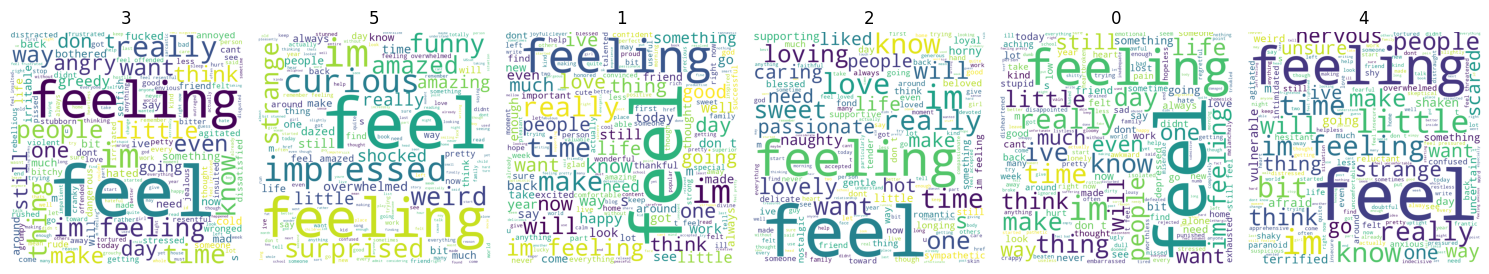

In [192]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15, 15))

for ax, emotion in zip(axes.flatten(), list(list_emotion)):
    text = " ".join(emotional_text[emotional_text['emotion'] == emotion][0])
    cloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)
    ax.imshow(cloud)
    ax.set_title(emotion)
    ax.axis("off")

plt.tight_layout()
plt.show()

# **6. Feature Extraction**

## 6.1- Feature Extraction


In [193]:
SUBMISSION_MODE = 0 # 0: Not submit, 1: Submit

In [194]:
X_train, y_train = emotional_text[['text_clean', 'text_len_clean']], emotional_text[["emotion"]]

if (SUBMISSION_MODE == 1):
  X_test = emotional_text_public_test[['text_clean', 'text_len_clean']]
else:
  X_train, X_test, y_train, y_test = train_test_split(emotional_text[['text_clean', 'text_len_clean']], emotional_text[["emotion"]], test_size=0.15, random_state=2023, stratify = emotional_text["emotion"])

In [195]:
print(f"X_train.shape = {X_train.shape}")
print(f"y_train.shape = {y_train.shape}")
print(f"X_test.shape = {X_test.shape}")

if (not SUBMISSION_MODE):
  print(f"y_test.shape = {y_test.shape}")

X_train.shape = (10775, 2)
y_train.shape = (10775, 1)
X_test.shape = (1902, 2)
y_test.shape = (1902, 1)


In [196]:
X_train

,text_clean,text_len_clean
9242,feel one episodes everything fell place really...,60
6900,know love shower grace never need feel unloved...,88
9139,still second guess still terrible time make de...,101
10868,feel like post something clever problem course...,74
3976,feel distract likewise attracted thing let kno...,69
...,...,...
2538,not work amount would like feel like lifestyle...,68
1209,feel feel ok wake,17
11576,sorta feel like everything delicate right,41
9557,see underground paris night make feel reassure,46


In [197]:
y_train

,emotion
9242,2
6900,0
9139,1
10868,1
3976,3
...,...
2538,1
1209,1
11576,2
9557,1


## 6.2- Tokenization


In [198]:
X_data_train = X_train['text_clean'].to_numpy()
Y_data_train = y_train['emotion'].to_numpy()
Y_data_train = tf.keras.utils.to_categorical(Y_data_train)

X_data_test = X_test['text_clean'].to_numpy()

In [199]:
X_data_train

array(['feel one episodes everything fell place really like one turn',
       'know love shower grace never need feel unloved reject lack anything not time thing money',
       'still second guess still terrible time make definitive decision certain truth know feel assured truth',
       ..., 'sorta feel like everything delicate right',
       'see underground paris night make feel reassure',
       'tire unhappy feeling listless unmotivated exhausted'],
      dtype=object)

In [200]:
Y_data_train

array([[0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [201]:
X_data_test

array(['feel positive today',
       'feel bernd would odds week around generous sportsbook',
       'feel festive torch week', ...,
       'feel bit disheartened blog wise recently',
       'feel indecisive want rest life',
       'feel bit less anxious actually start look forward challenge big event'],
      dtype=object)

In [202]:
MAX_WORD = max(X_train['text_len_clean'])
MAX_WORD

221

In [203]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='',oov_token='<OOV>',lower=False)
tokenizer.fit_on_texts(X_data_train)
X_data_train = tokenizer.texts_to_sequences(X_data_train)
X_data_test = tokenizer.texts_to_sequences(X_data_test)

In [204]:
X_data_train_pad = tf.keras.preprocessing.sequence.pad_sequences(X_data_train, padding='post', maxlen = MAX_WORD)
X_data_test_pad = tf.keras.preprocessing.sequence.pad_sequences(X_data_test, padding='post', maxlen = MAX_WORD)
print(f"X_data_train_pad.shape = {X_data_train_pad.shape}")
print(f"X_data_test_pad.shape = {X_data_test_pad.shape}")

X_data_train_pad.shape = (10775, 221)
X_data_test_pad.shape = (1902, 221)


In [205]:
word_index = tokenizer.word_index
vocab_size = len(word_index)
vocab_size

9769

In [206]:
x_train_train, x_train_val, y_train_train, y_train_val = train_test_split(X_data_train_pad, Y_data_train, test_size=0.15, random_state=42, stratify = y_train['emotion'].to_numpy())

In [207]:
print(f'x_train_train.shape = {x_train_train.shape}')
print(f'y_train_train.shape = {y_train_train.shape}')
print(f'x_train_val.shape = {x_train_val.shape}')
print(f'y_train_val.shape = {y_train_val.shape}')

x_train_train.shape = (9158, 221)
y_train_train.shape = (9158, 6)
x_train_val.shape = (1617, 221)
y_train_val.shape = (1617, 6)


# **7. Training model**

## 7.1- Helper function

In [208]:
class_weights = sklearn.utils.compute_class_weight(
    class_weight = "balanced",
    classes = np.unique(y_train['emotion'].to_numpy()),
    y = y_train['emotion'].to_numpy()
)
class_weights

array([0.57265094, 0.49581263, 2.04770049, 1.23594861, 1.37822973,
       4.67664931])

In [209]:
def weighted_categorical_crossentropy(y_true, y_pred):
    """
    y_true: Tensor of shape (batch_size, 6) with one-hot encoded labels.
    y_pred: Tensor of shape (batch_size, 6) with softmax probabilities.
    """
    # Clip y_pred to avoid log(0)
    y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())

    # Compute the standard categorical crossentropy per sample.
    # Since y_true is one-hot, only the true class contributes.
    unweighted_loss = -tf.reduce_sum(y_true * tf.math.log(y_pred), axis=1)

    # Get the true class for each sample (the index where y_true==1)
    true_class = tf.argmax(y_true, axis=1)

    # Convert class_weights to a tensor (shape: (6,))
    cw = tf.constant(class_weights, dtype=tf.float32)

    # Gather the weight for each sample based on its true class.
    sample_weights = tf.gather(cw, true_class)

    # Scale the loss for each sample by its weight.
    weighted_loss = unweighted_loss * sample_weights

    # Return the average loss over the batch.
    return tf.reduce_mean(weighted_loss)

## 7.2- Model 1

In [ ]:
embedding_dim = 190 # The dimension of word embeddings

# Define input tensor
sequence_input = tf.keras.Input(shape=(MAX_WORD,), dtype='int32')

# Word embedding layer
embedded_inputs = tf.keras.layers.Embedding(vocab_size + 1, embedding_dim)(sequence_input)

# Apply dropout to prevent overfitting
embedded_inputs = tf.keras.layers.Dropout(0.2)(embedded_inputs)

# Apply Bidirectional LSTM over embedded inputs
lstm_outs = tf.keras.layers.Bidirectional(
    tf.keras.layers.LSTM(embedding_dim, return_sequences=True)
)(embedded_inputs)

# Apply dropout to LSTM outputs to prevent overfitting
lstm_outs = tf.keras.layers.Dropout(0.2)(lstm_outs)

# Attention Mechanism - Generate attention vectors
input_dim = int(lstm_outs.shape[2])
permuted_inputs = tf.keras.layers.Permute((2, 1))(lstm_outs)
attention_vector = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1))(lstm_outs)
attention_vector = tf.keras.layers.Reshape((MAX_WORD,))(attention_vector)
attention_vector = tf.keras.layers.Activation('softmax', name='attention_vec')(attention_vector)
attention_output = tf.keras.layers.Dot(axes=1)([lstm_outs, attention_vector])

# Last layer: fully connected with softmax activation
fc = tf.keras.layers.Dense(embedding_dim, activation='relu')(attention_output)
output = tf.keras.layers.Dense(6, activation='softmax')(fc)

# Finally building model
model = tf.keras.Model(inputs=sequence_input, outputs=output)

# Print model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 221)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 221, 190)       │      1,856,300 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 221, 190)       │              0 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional             │ (None, 221, 380)       │        579,120 │ dropout[0][0]          │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 221, 380)       │              0 │ bidirectional[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed          │ (None, 221, 1)         │            381 │ dropout_1[0][0]        │
│ (TimeDistributed)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 221)            │              0 │ time_distributed[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_vec             │ (None, 221)            │              0 │ reshape[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dot (Dot)                 │ (None, 380)            │              0 │ dropout_1[0][0],       │
│                           │                        │                │ attention_vec[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 190)            │         72,390 │ dot[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 6)              │          1,146 │ dense_1[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,509,337 (9.57 MB)

 Trainable params: 2,509,337 (9.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile
model.compile(loss=weighted_categorical_crossentropy,
              metrics=["accuracy", tf.keras.metrics.F1Score(average="macro")],
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3))

# Checkpoint
checkpoint_filepath = './lstm_attention_1.weights.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_f1_score',
    mode='max',
    save_best_only=True,
    save_weights_only=True,
)

In [ ]:
history = model.fit(x_train_train, y_train_train, validation_data=(x_train_val, y_train_val), batch_size = 16, epochs = 10, callbacks = [model_checkpoint_callback])

Epoch 1/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 48s 57ms/step - accuracy: 0.1284 - f1_score: 0.1178 - loss: 1.7993 - val_accuracy: 0.1206 - val_f1_score: 0.0359 - val_loss: 1.7964
Epoch 2/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 30s 52ms/step - accuracy: 0.1495 - f1_score: 0.1265 - loss: 1.7554 - val_accuracy: 0.8188 - val_f1_score: 0.7828 - val_loss: 0.4886
Epoch 3/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 31s 54ms/step - accuracy: 0.8825 - f1_score: 0.8483 - loss: 0.3671 - val_accuracy: 0.8949 - val_f1_score: 0.8608 - val_loss: 0.2906
Epoch 4/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.9546 - f1_score: 0.9378 - loss: 0.1169 - val_accuracy: 0.9011 - val_f1_score: 0.8725 - val_loss: 0.2994
Epoch 5/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.9763 - f1_score: 0.9687 - loss: 0.0603 - val_accuracy: 0.8973 - val_f1_score: 0.8646 - val_loss: 0.3514
Epoch 6/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.9844 - f1_score: 0.9793 - loss: 0.0414 - val_accuracy: 0.8881 - val_f1_s

In [ ]:
model.load_weights(checkpoint_filepath)
y_pred = model.predict(X_data_test_pad)
y_pred = np.argmax(y_pred, axis=1)
y_pred

60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step


array([1, 2, 1, ..., 0, 4, 4])

In [ ]:
#Model Evaluation - Classification Metrics
if (not SUBMISSION_MODE):
  print(classification_report(y_test['emotion'].to_numpy(), y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       553
           1       0.95      0.89      0.92       639
           2       0.71      0.88      0.78       155
           3       0.87      0.89      0.88       257
           4       0.82      0.86      0.84       230
           5       0.70      0.78      0.74        68

    accuracy                           0.89      1902
   macro avg       0.83      0.87      0.85      1902
weighted avg       0.90      0.89      0.89      1902



## 7.3- Model 2

In [218]:
# Custom Attention Layer (Fixed)
class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)
        self.attention_dense = tf.keras.layers.Dense(1, activation='tanh')  # ✅ Khai báo trong __init__()
        self.flatten = tf.keras.layers.Flatten()
        self.softmax = tf.keras.layers.Activation('softmax')

    def call(self, inputs):
        attention = self.attention_dense(inputs)  # Dùng biến đã khai báo sẵn
        attention = self.flatten(attention)
        attention = self.softmax(attention)
        attention = tf.keras.layers.RepeatVector(inputs.shape[-1])(attention)
        attention = tf.keras.layers.Permute((2, 1))(attention)
        attended_output = tf.keras.layers.Multiply()([inputs, attention])
        return tf.keras.backend.sum(attended_output, axis=1)

    def get_config(self):
        config = super().get_config()
        return config

# Model LSTM + Attention
embedding_dim = 240 # The dimension of word embeddings
inputs = tf.keras.Input(shape=(MAX_WORD, ))
embedding = tf.keras.layers.Embedding(vocab_size + 1, embedding_dim)(inputs)
x = tf.keras.layers.LSTM(128, return_sequences=True)(embedding)  # return_sequences=True để dùng Attention
x = AttentionLayer()(x)  # Thay vì Lambda, dùng AttentionLayer
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(6, activation='softmax')(x)

In [219]:
# Finally building model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Print model summary
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 221)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_2 (Embedding)              │ (None, 221, 240)            │       2,344,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 221, 128)            │         188,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention_layer_1 (AttentionLayer)   │ (None, 128)                 │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,534,631 (9.67 MB)

 Trainable params: 2,534,631 (9.67 MB)

 Non-trainable params: 0 (0.00 B)

In [220]:
# Compile
model.compile(loss=weighted_categorical_crossentropy,
              metrics=["accuracy", tf.keras.metrics.F1Score(average="macro")],
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3))

# Checkpoint
checkpoint_filepath = './lstm_attention_2.weights.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_f1_score',
    mode='max',
    save_best_only=True,
    save_weights_only=True,
)

In [221]:
history = model.fit(x_train_train, y_train_train, validation_data=(x_train_val, y_train_val), batch_size = 16, epochs = 100, callbacks = [model_checkpoint_callback])

Epoch 1/100
573/573 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.1515 - f1_score: 0.1361 - loss: 1.8101 - val_accuracy: 0.1435 - val_f1_score: 0.0980 - val_loss: 1.7347
Epoch 2/100
573/573 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.5901 - f1_score: 0.5068 - loss: 1.2265 - val_accuracy: 0.8423 - val_f1_score: 0.8034 - val_loss: 0.5316
Epoch 3/100
573/573 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9029 - f1_score: 0.8695 - loss: 0.3565 - val_accuracy: 0.8639 - val_f1_score: 0.8282 - val_loss: 0.3894
Epoch 4/100
573/573 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9464 - f1_score: 0.9297 - loss: 0.1528 - val_accuracy: 0.8757 - val_f1_score: 0.8453 - val_loss: 0.4454
Epoch 5/100
573/573 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9614 - f1_score: 0.9506 - loss: 0.1310 - val_accuracy: 0.8652 - val_f1_score: 0.8347 - val_loss: 0.4830
Epoch 6/100
573/573 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9777 - f1_score: 0.9686 - loss: 0.0670 - val_accuracy: 0.8788 - val_f

In [222]:
model.load_weights(checkpoint_filepath)
y_pred = model.predict(X_data_test_pad)
y_pred = np.argmax(y_pred, axis=1)
y_pred

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


array([1, 2, 1, ..., 0, 4, 4])

In [223]:
#Model Evaluation - Classification Metrics
if (not SUBMISSION_MODE):
  print(classification_report(y_test['emotion'].to_numpy(), y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       553
           1       0.89      0.89      0.89       639
           2       0.72      0.71      0.71       155
           3       0.86      0.88      0.87       257
           4       0.85      0.81      0.83       230
           5       0.64      0.82      0.72        68

    accuracy                           0.87      1902
   macro avg       0.82      0.84      0.83      1902
weighted avg       0.87      0.87      0.87      1902



## 7.4 - Model 3

In [244]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    # TODO: Add masking
    def call(self, query, values):
        # query : [batch_size, hidden_size]
        # values: [batch_size, maxlen, hidden_size]

        # (batch_size, 1, hidden_size)
        hidden_with_time_axis = tf.expand_dims(query, 1)

        # (batch_size, maxlen, units) + (batch_size, 1, units) = (batch_size, maxlen, units)
        score = self.W1(values) + self.W2(hidden_with_time_axis)

        # (batch_size, maxlen, 1)
        score = self.V(tf.nn.tanh(score))

        # attention_weights shape == (batch_size, maxlen, 1)
        attention_weights = tf.nn.softmax(score, axis=1)

        # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights


# Model LSTM + Attention
embedding_dim = 240 # The dimension of word embeddings
inputs = tf.keras.Input(shape=(MAX_WORD, ))
embedding = tf.keras.layers.Embedding(vocab_size + 1, embedding_dim)(inputs)
x, hs, cs = tf.keras.layers.LSTM(32, return_sequences=True, return_state=True)(embedding)
x, weights = BahdanauAttention(16)(hs, x)
outputs = tf.keras.layers.Dense(6, activation='softmax')(x)

# Finally building model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Print model summary
model.summary()

Model: "functional_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12            │ (None, 221)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_12 (Embedding)  │ (None, 221, 240)       │      2,344,800 │ input_layer_12[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_30 (LSTM)            │ [(None, 221, 32),      │         34,944 │ embedding_12[0][0]     │
│                           │ (None, 32), (None,     │                │                        │
│                           │ 32)]                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bahdanau_attention        │ [(None, 32), (None,    │          1,073 │ lstm_30[0][1],         │
│ (BahdanauAttention)       │ 221, 1)]               │                │ lstm_30[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_17 (Dense)          │ (None, 6)              │            198 │ bahdanau_attention[0]… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,381,015 (9.08 MB)

 Trainable params: 2,381,015 (9.08 MB)

 Non-trainable params: 0 (0.00 B)

In [245]:
# Compile
model.compile(loss=weighted_categorical_crossentropy,
              metrics=["accuracy", tf.keras.metrics.F1Score(average="macro")],
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3))

# Checkpoint
checkpoint_filepath = './lstm_attention_3.weights.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_f1_score',
    mode='max',
    save_best_only=True,
    save_weights_only=True,
)

In [246]:
history = model.fit(x_train_train, y_train_train, validation_data=(x_train_val, y_train_val), batch_size = 16, epochs = 5, callbacks = [model_checkpoint_callback])

Epoch 1/5
573/573 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.3229 - f1_score: 0.2825 - loss: 1.5878 - val_accuracy: 0.8831 - val_f1_score: 0.8516 - val_loss: 0.3377
Epoch 2/5
573/573 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9174 - f1_score: 0.8876 - loss: 0.2320 - val_accuracy: 0.8973 - val_f1_score: 0.8686 - val_loss: 0.2759
Epoch 3/5
573/573 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9593 - f1_score: 0.9419 - loss: 0.1055 - val_accuracy: 0.8930 - val_f1_score: 0.8574 - val_loss: 0.2976
Epoch 4/5
573/573 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9796 - f1_score: 0.9671 - loss: 0.0568 - val_accuracy: 0.8961 - val_f1_score: 0.8615 - val_loss: 0.3689
Epoch 5/5
573/573 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9883 - f1_score: 0.9831 - loss: 0.0342 - val_accuracy: 0.8868 - val_f1_score: 0.8492 - val_loss: 0.3834


In [247]:
model.load_weights(checkpoint_filepath)
y_pred = model.predict(X_data_test_pad)
y_pred = np.argmax(y_pred, axis=1)
y_pred

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


array([1, 2, 1, ..., 0, 4, 4])

In [248]:
#Model Evaluation - Classification Metrics
if (not SUBMISSION_MODE):
  print(classification_report(y_test['emotion'].to_numpy(), y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       553
           1       0.97      0.88      0.92       639
           2       0.71      0.92      0.81       155
           3       0.87      0.91      0.89       257
           4       0.87      0.87      0.87       230
           5       0.70      0.88      0.78        68

    accuracy                           0.90      1902
   macro avg       0.85      0.90      0.87      1902
weighted avg       0.91      0.90      0.90      1902



## 7.3 Submission

In [255]:
# Dự đoán nhãn
if (SUBMISSION_MODE):
  model.load_weights(checkpoint_filepath)
  y_pred = model.predict(X_data_test_pad)
  y_pred = np.argmax(y_pred, axis=1)
  result = pd.DataFrame({"emotion": y_pred})
  result.to_pickle('submission.pkl')
  with zipfile.ZipFile("submission.zip", "w") as zipf:
      zipf.write("submission.pkl")